# Data Insights Summary Notebook

This notebook contains all pertinent visualizations presented in the full analysis found at the: **Combined Data Visualization and Insights Notebook**

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
import re
import plotly.express as px

%matplotlib inline

# for translation
import sys
sys.path.append('../')
from Translate_data import translate_data

# to plot
import altair as alt
alt.renderers.enable('mimetype')
alt.renderers.enable('notebook')
alt.renderers.enable('default')


# root to call the data 
root = "../../../data/"

In [2]:
# Set Display Options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Load Data
df = pd.read_csv(root + 'saber_combined_all_fields.csv')
df = df.drop(columns = 'Unnamed: 0')

# Translate data
df_eng = translate_data(df, 'spanish', 'english')
saber = df_eng.copy() 

In [3]:
# Wrangling Department

# - - - correct code - - - 
# Change code from float to int
df_eng['your_dept_code_resides'] = df_eng[['your_dept_code_resides']].apply(np.int64).astype(str)
df_eng['your_dept_code_resides.1'] = df_eng[['your_dept_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df_eng['your_dept_code_resides'] = ["0"+i if len(i)==1 else i for i in df_eng['your_dept_code_resides']]
df_eng['your_dept_code_resides.1'] = ["0"+i if len(i)==1 else i for i in df_eng['your_dept_code_resides.1']]

# Wrangling Municipality

# - - - correct name - - - 
import re
municipality_list = list(df_eng['cole_municipality_location'].unique()) + \
                    list(df_eng['your_municipality_resides'].unique()) + \
                    list(df_eng['your_inst_municipality'].unique()) + \
                    list(df_eng['your_municipality_resides.1'].unique())

municipality_list = pd.DataFrame(data=municipality_list, columns=['Name'])#.unique()
municipality_list = list(municipality_list.Name.unique())
municipality_list = [str(i) for i in municipality_list]
municipality_list = sorted(municipality_list)
municipality_values = sorted(municipality_list)

municipality_values = [re.sub(r'BOGOTÁ, D.C.', 'BOGOTÁ D.C.', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CARTAGENA$', 'CARTAGENA DE INDIAS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CHIQUINQUIRA$', 'CHIQUINQUIRÁ', mun) for mun in municipality_values]
municipality_values = [re.sub(r'CIÉNEGA$', 'CIÉNAGA', mun) for mun in municipality_values]
municipality_values = [re.sub(r'PUERTO ASIS$', 'PUERTO ASÍS', mun) for mun in municipality_values]
municipality_values = [re.sub(r'POPAYAN$', 'POPAYÁN', mun) for mun in municipality_values]
municipality_values = [re.sub(r'FACATATIVÁ$', 'FACATATIVA', mun) for mun in municipality_values]

zip_iterator = zip(municipality_list, municipality_values) # Get pairs of elements
municipality_dict = dict(zip_iterator)  # Convert to dictionary

municipality_columns = ['cole_municipality_location', 'your_municipality_resides',
                        'your_inst_municipality', 'your_municipality_resides.1']

for col in municipality_columns:
    df_eng[col] = df_eng[col].map(municipality_dict)
    
# - - - correct code - - - 
# Change code from float to int
df_eng['your_municipality_code_resides'] = df_eng[['your_municipality_code_resides']].apply(np.int64).astype(str)
df_eng['your_municipality_code_resides.1'] = df_eng[['your_municipality_code_resides.1']].apply(np.int64).astype(str)

# two-digit code for Department (Colombian States)
df_eng['your_municipality_code_resides'] = ["0"+i if len(i)==4 else i for i in df_eng['your_municipality_code_resides']]
df_eng['your_municipality_code_resides.1'] = ["0"+i if len(i)==4 else i for i in df_eng['your_municipality_code_resides.1']]

In [4]:
# Remove duplicated columns
saber = saber.loc[:, ~saber.columns.duplicated()]
saber.shape

(212010, 142)

# Student Distributions

The following section covers illustrating the distribution of student population based on different features. 

## Gender


In [5]:
source = df_eng.groupby('your_gender').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),
    alt.Y('your_gender', title="Gender"),
    alt.Color('your_gender')
).properties(
    title = "Number of students per Gender"
)

alt.Chart(...)

## Foreigners

In [6]:
source = df_eng.groupby('your_foreigner').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_foreigner', title="Foreigner"),
    alt.Color('your_foreigner')
).properties(
    title = "Number of students per Local or Foreigners"
)

alt.Chart(...)

## Marital Status

In [7]:
source = df_eng.groupby('your_marital_status').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_marital_status', sort="-x", title="Marital Status"),
    alt.Color('your_marital_status', legend=None),
    tooltip=['your_marital_status', 'obs']
).properties(
    title = "Number of students per Marital Status"
)

alt.Chart(...)

## Country residence

In [8]:
source = df_eng.groupby('your_country_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('your_country_resides', sort="-y", title="Country of Residence"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_country_resides', legend=None, sort="-y")
).properties(
    title = "Number of students per Country of Residence"
)

alt.Chart(...)

## Ethnicity

In [9]:
source = df_eng.groupby('your_have_ethnicity').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_have_ethnicity', title="Ethnicity"),
    alt.Color('your_have_ethnicity', legend=None),
    tooltip=['your_have_ethnicity', 'obs']
).properties(
    title = "Number of students with or without Ethnicity"
)

alt.Chart(...)

## Department of residence (Colombia states)

In [10]:
# Plot number of students in Colombia by Department (State)

### DATA ###
# States Polygons
states = alt.topo_feature(root + 'Colombia_departamentos_municipios_poblacion-topo.json', 'MGN_AMN_DPTOS')

# Dataframe of the project 'group by' for plotting
source = df_eng.groupby(['your_dept_resides', 'your_dept_code_resides']).\
        count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs',
                                                                    'your_dept_resides': 'name',
                                                                    'your_dept_code_resides': 'code'})

### PLOT ###
# background
base_depart  = alt.Chart(states).mark_geoshape(
    fill='white',
    stroke='red'
).properties(
    width=500,
    height=300
)

# find Department by code
plot_depart_by_code = alt.Chart(states).mark_geoshape(stroke='salmon').encode(
    alt.Color('obs:Q', scale=alt.Scale(type='log'), title="Students")
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=['obs'])
).properties(
    width=500,
    height=300
)

# Integrate the plots
plot_depart = (base_depart + plot_depart_by_code)\
                    .properties(title="Number of students in Colombia by Department (State)")
plot_depart

alt.LayerChart(...)

## High School Degree

In [11]:
source = df_eng.groupby('your_high_school_degree').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Y('your_high_school_degree', sort='-x', title="High School Degree"),
    alt.Color('your_high_school_degree', legend=None),
    tooltip=['your_high_school_degree', 'obs']
).properties(
    title = "Number of students per High School Degree"
)

alt.Chart(...)

## Tuition Payments

In [12]:
source = df_eng.groupby('your_tuition').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

source_order = ['Less than 87,000', 'Between 87,000 and less than 120,000', 'Between 120,000 and less than 150,000',
                'Between 150,000 and less than 250,000', '250,000 or more', 'Does not pay Pension']

alt.Chart(source).mark_bar().encode(
    alt.X('obs', title="Observations"),#, scale=alt.Scale(type='log')),
    alt.Y('your_tuition', sort=source_order, title="Tuition"),
    alt.Color('your_tuition', legend=None),
    tooltip=['your_tuition', 'obs']
).properties(
    title = "Number of students per Tuition"
)

alt.Chart(...)

## Municipality

In [13]:
source = df_eng.groupby('your_municipality_resides').count()[['your_consecutive']].reset_index().rename(columns={'your_consecutive':'obs'})

print("\nNumber of Municipalities in Colombia:", len(source), "\n")

alt.Chart(source).mark_bar(opacity=0.9).encode(
    alt.X('your_municipality_resides', sort='-y', title="Municipality"),
    alt.Y('obs', title="Observations", scale=alt.Scale(type='log')),
    alt.Color('your_municipality_resides', legend=None, sort='-y',
             scale=alt.Scale(scheme='yellowgreenblue', reverse=True)
             ),
    tooltip=['your_municipality_resides', 'obs']
).properties(
    width=8500,
    title = "Number of students per Municipality"
)


Number of Municipalities in Colombia: 961 



alt.Chart(...)

In [14]:
# Separating the scores into respective lists

marks = [
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11', 
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

saber_marks = [ 
 'score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11',
 'score_optative_saber_11',
 ]

saber_pro_marks = [
 'score_math_saber_pro',
 'score_language_saber_pro',
 'score_social_science_saber_pro',
 'score_english_saber_pro',
 'score_writing_saber_pro'
 ]

# Adding column of total saber and saber pro scores

saber['total_saber_score'] = saber[saber_marks].sum(axis=1)
saber['total_saber_pro_score'] = saber[saber_pro_marks].sum(axis=1)

total_marks = ['total_saber_score', 'total_saber_pro_score']

# Scores by Subject for Department Analysis

This section illustration the student distribution across Colombian Departments by subject for Saber and Saber Pro.  

In [15]:
# Average of Saber-11 scores per Department by Subject

source = pd.DataFrame(columns=['your_dept_resides', 'your_dept_code_resides', 'average', 'subject'])
saber_11_scores = ['score_language_saber_11', 'score_mathematics_saber_11', 'score_biology_saber_11', 
                   'score_chemistry_saber_11', 'score_physics_saber_11', 'score_social_science_saber_11', 
                   'score_philosophy_saber_11', 'score_english_saber_11', 'score_optative_saber_11']
saber_11_subjects = ['biology', 'chemistry', 'english', 'language', 'mathematics', 'optative', 'philosophy', 'physics', 'social_science']

for i in saber_11_scores:
    aux = df_eng.groupby(['your_dept_resides', 'your_dept_code_resides']).mean()[[i]].reset_index().rename(columns={i:'average'})
    aux.sort_values(by=['average'], ascending=False, inplace=True)
    aux = pd.concat([aux.head(20), aux.tail(20)])
    aux['subject'] = re.sub(r'_saber_11', '', re.sub(r'score_', '', i)) # Cleans the subject text
    source = pd.concat([source, aux])

source = pd.pivot_table(source, values='average',
                        index=['your_dept_resides', 'your_dept_code_resides'],
                        columns=['subject']).reset_index().rename(columns={'your_dept_resides': 'name',
                                'your_dept_code_resides': 'code'})

### PLOT ###
# find Department by code
plot_saber11_by_code = base_depart.mark_geoshape(stroke='salmon').encode(
#     alt.Color('average:Q', title="Score"), #scale=alt.Scale(type='log'),
    alt.Color(alt.repeat('row'), type='quantitative'),
).transform_lookup(
    lookup='properties.DPTO_CCDGO',
    from_=alt.LookupData(data=source, key='code', fields=saber_11_subjects)
).properties(
    width=500,
    height=300
).repeat(
    row=saber_11_subjects
).resolve_scale(
    color='independent'
)

plot_saber11_by_code.properties(title="Average of Saber-11 scores per Department by Subject")

alt.RepeatChart(...)

In [16]:
# Highlight min and max values
df_eng.groupby('your_dept_resides').mean()[saber_marks].style.background_gradient(cmap='Blues')\
                                                             .highlight_max(color = 'orange', axis=0)\
                                                             .highlight_min(color = 'lightgreen', axis=0)
                                                        

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_optative_saber_11
your_dept_resides,,,,,,,,,
AMAZONAS,47.687500,44.281250,45.187500,45.593750,44.906250,44.968750,42.531250,41.281250,38.781250
ANTIOQUIA,51.970659,52.128493,49.445644,49.514712,48.272604,50.037583,45.031237,52.709800,32.709346
ARAUCA,47.164062,45.562500,45.863281,45.941406,44.328125,45.515625,40.820312,44.234375,35.570312
ATLANTICO,50.889175,51.114182,48.909454,49.694730,49.149029,48.751214,44.580905,52.257855,31.991859
BOGOTA,53.219333,54.505108,51.126950,52.156149,50.572982,51.582033,46.914354,56.926112,28.287097
BOLIVAR,50.188814,49.543773,48.319612,49.208501,47.931544,48.358986,44.094705,48.479642,34.034154
BOYACA,50.771358,52.238558,49.608886,50.281083,48.597063,49.943745,44.757056,48.817124,27.983410
CALDAS,51.037684,51.158548,49.297335,50.097656,48.431526,49.367647,44.875689,50.080653,30.986903
CAQUETA,48.094925,46.906015,46.679511,47.180451,45.802632,47.192669,41.955827,44.767857,32.175752


The geospatial map and the groupby table show that <code>**EXTRAJERO DEPARTMENT**</code> holds the highest mean scores for almost all subjects while <code>**CHOCO DEPARTMENT**</code> holds the lowest mean scores for almost all subjects. 

# Scores by Municipality Analysis

This visualization aims to present student distribution across Municipalities.

In [17]:
saber_municipality = saber.copy()
saber_municipality_score = saber_municipality.groupby("your_municipality_resides").agg(['mean', 'count'])[total_marks]
threshold = saber_municipality['your_municipality_resides'].value_counts().describe()['50%']
print("The 50th percentile are municipalities that have {} instances in the dataset".format(threshold))

# Filter municipalities with > 50% percentile instances
saber_municipality_score = saber_municipality_score[saber_municipality_score['total_saber_score']['count'] > threshold]
print("Total municipalities left: {}".format(saber_municipality_score.shape[0]))

# Top and Bottom municipalities
top_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber = saber_municipality_score['total_saber_score']['mean'].sort_values(ascending=False).tail(50)

The 50th percentile are municipalities that have 15.0 instances in the dataset
Total municipalities left: 471


In [18]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber 11 Scores')

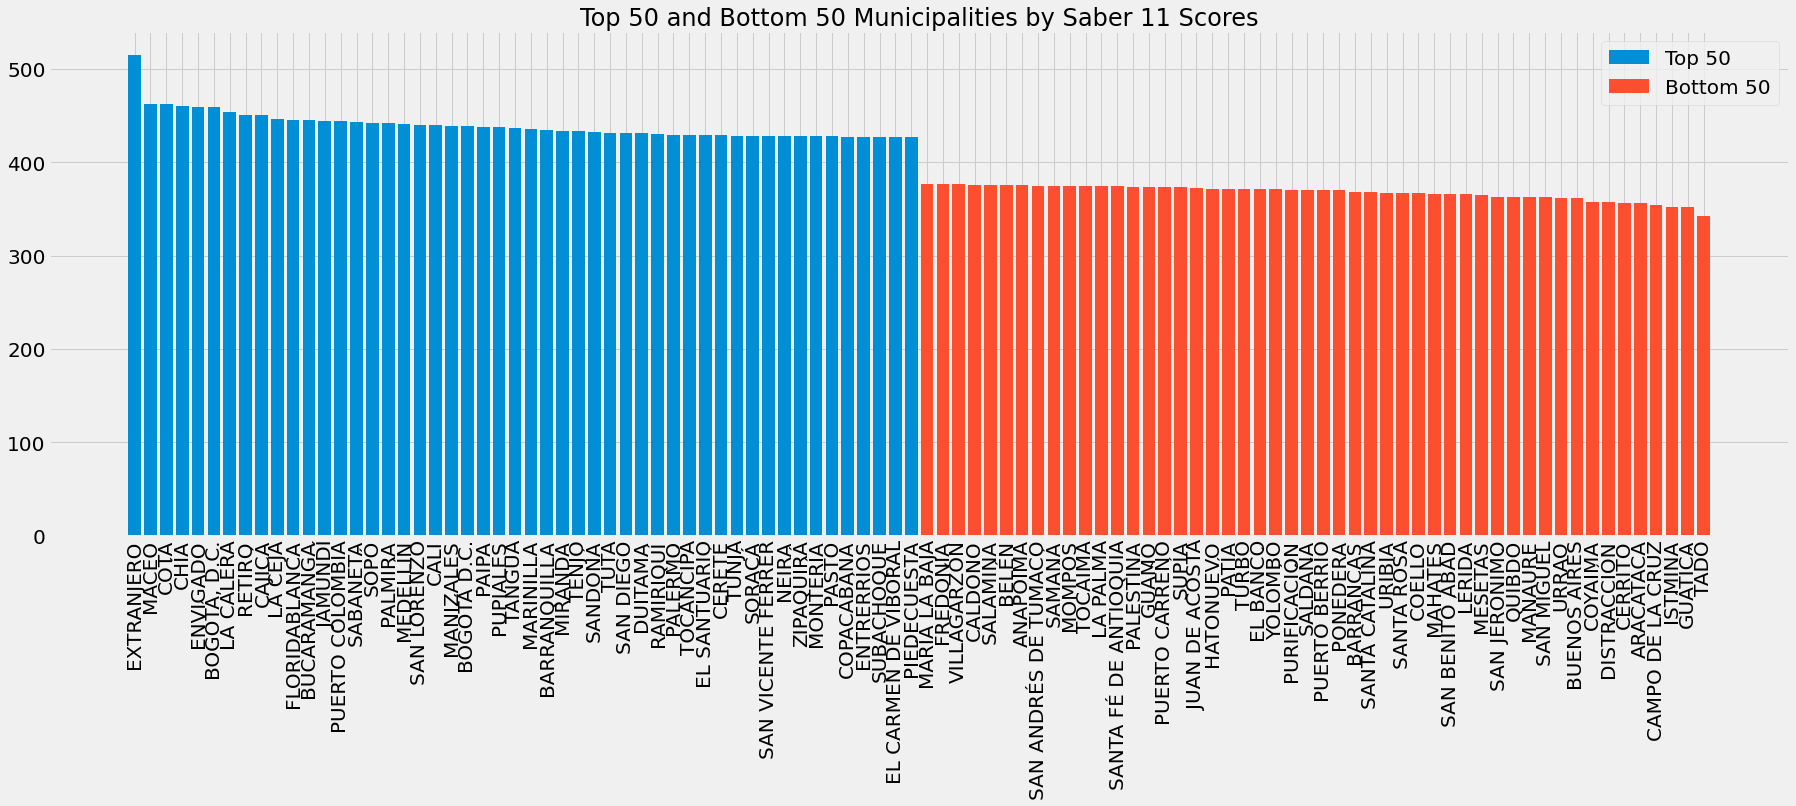

In [19]:
plt.figure(figsize=(25,10))

plt.bar(top_50_saber.index, top_50_saber, label = 'Top 50')
plt.bar(bot_50_saber.index, bot_50_saber, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

plt.title('Top 50 and Bottom 50 Municipalities by Saber 11 Scores', fontsize=24)

In [20]:
top_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).head(50)
bot_50_saber_pro = saber_municipality_score['total_saber_pro_score']['mean'].sort_values(ascending=False).tail(50)

Text(0.5, 1.0, 'Top 50 and Bottom 50 Municipalities by Saber Pro Scores')

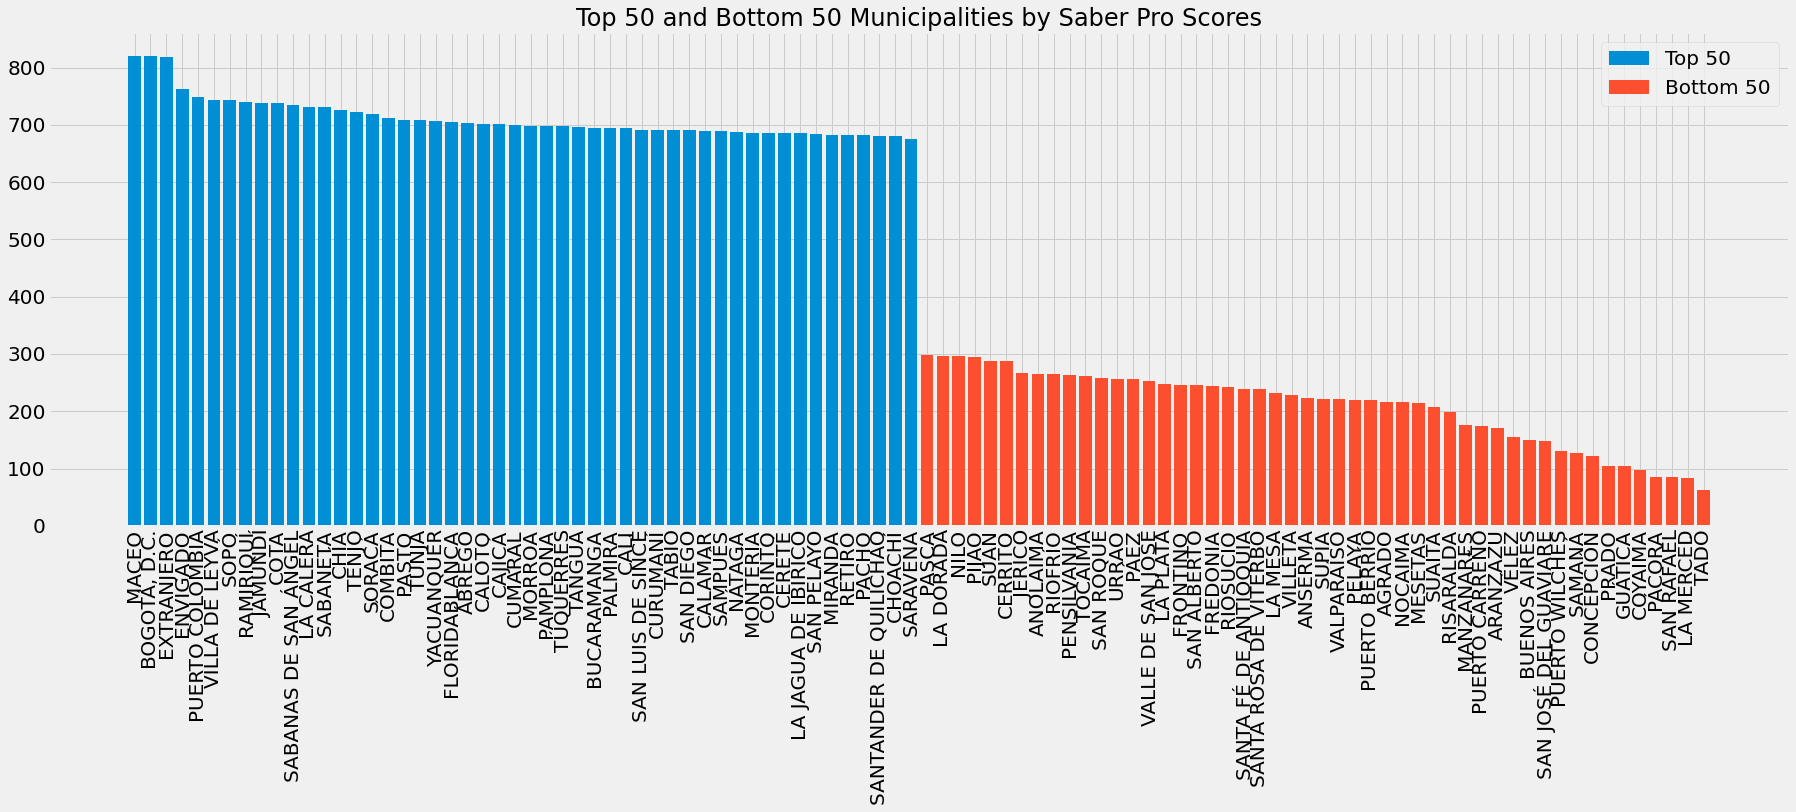

In [21]:
plt.figure(figsize=(25,10))

plt.bar(top_50_saber_pro.index, top_50_saber_pro, label = 'Top 50')
plt.bar(bot_50_saber_pro.index, bot_50_saber_pro, label = 'Bottom 50')
plt.xticks(rotation=90)
plt.legend(prop={'size': 20})
plt.tight_layout()
plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)

plt.title('Top 50 and Bottom 50 Municipalities by Saber Pro Scores', fontsize=24)

From the two graphs, we see that there is a great mean score difference between the Top 50 and Bottom 50 Municipalities. There is an even greater difference in <code> Saber Pro </code>. We will explore these differences by first examining the factors that affect mean scores. 

# Scores by Social Factors

This section aims to visualize whether certain social factors have an effect to mean scores.

For the full analysis: check out the <code> Combined Data Visualization and Insights Notebook </code>

In [22]:
relevant_social_factors = ['your_course_teacher_ies', "your_course_external_support_ies", 'your_course_external_ies', 
                           'fami_housing_stratum', 'fami_internet', 'fami_computer', 'fami_automobile', 'fami_father_education', 'fami_mother_education',
                           'fami_father_occupation','fami_mother_occupation']

In [23]:
saber_top_50_municipalities = top_50_saber.index.to_list()
saber_bot_50_municipalities = bot_50_saber.index.to_list()
saber_pro_top_50_municipalities = top_50_saber_pro.index.to_list()
saber_pro_bot_50_municipalities = bot_50_saber_pro.index.to_list()

In [24]:
saber_pro_top_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_top_50_municipalities)]
print("There are {} datapoints in the saber dataset for all top 50 municipalities".format(saber_pro_top_50.shape[0]))

saber_pro_bot_50 = saber.loc[saber['your_municipality_resides'].isin(saber_pro_bot_50_municipalities)]
print("There are {} datapoints in the saber dataset for all bot 50 municipalities".format(saber_pro_bot_50.shape[0]))

There are 54195 datapoints in the saber dataset for all top 50 municipalities
There are 2258 datapoints in the saber dataset for all bot 50 municipalities


## Characterizing Top 50 and Bottom Municipalities

### Access to test preparation

<Figure size 1440x720 with 0 Axes>

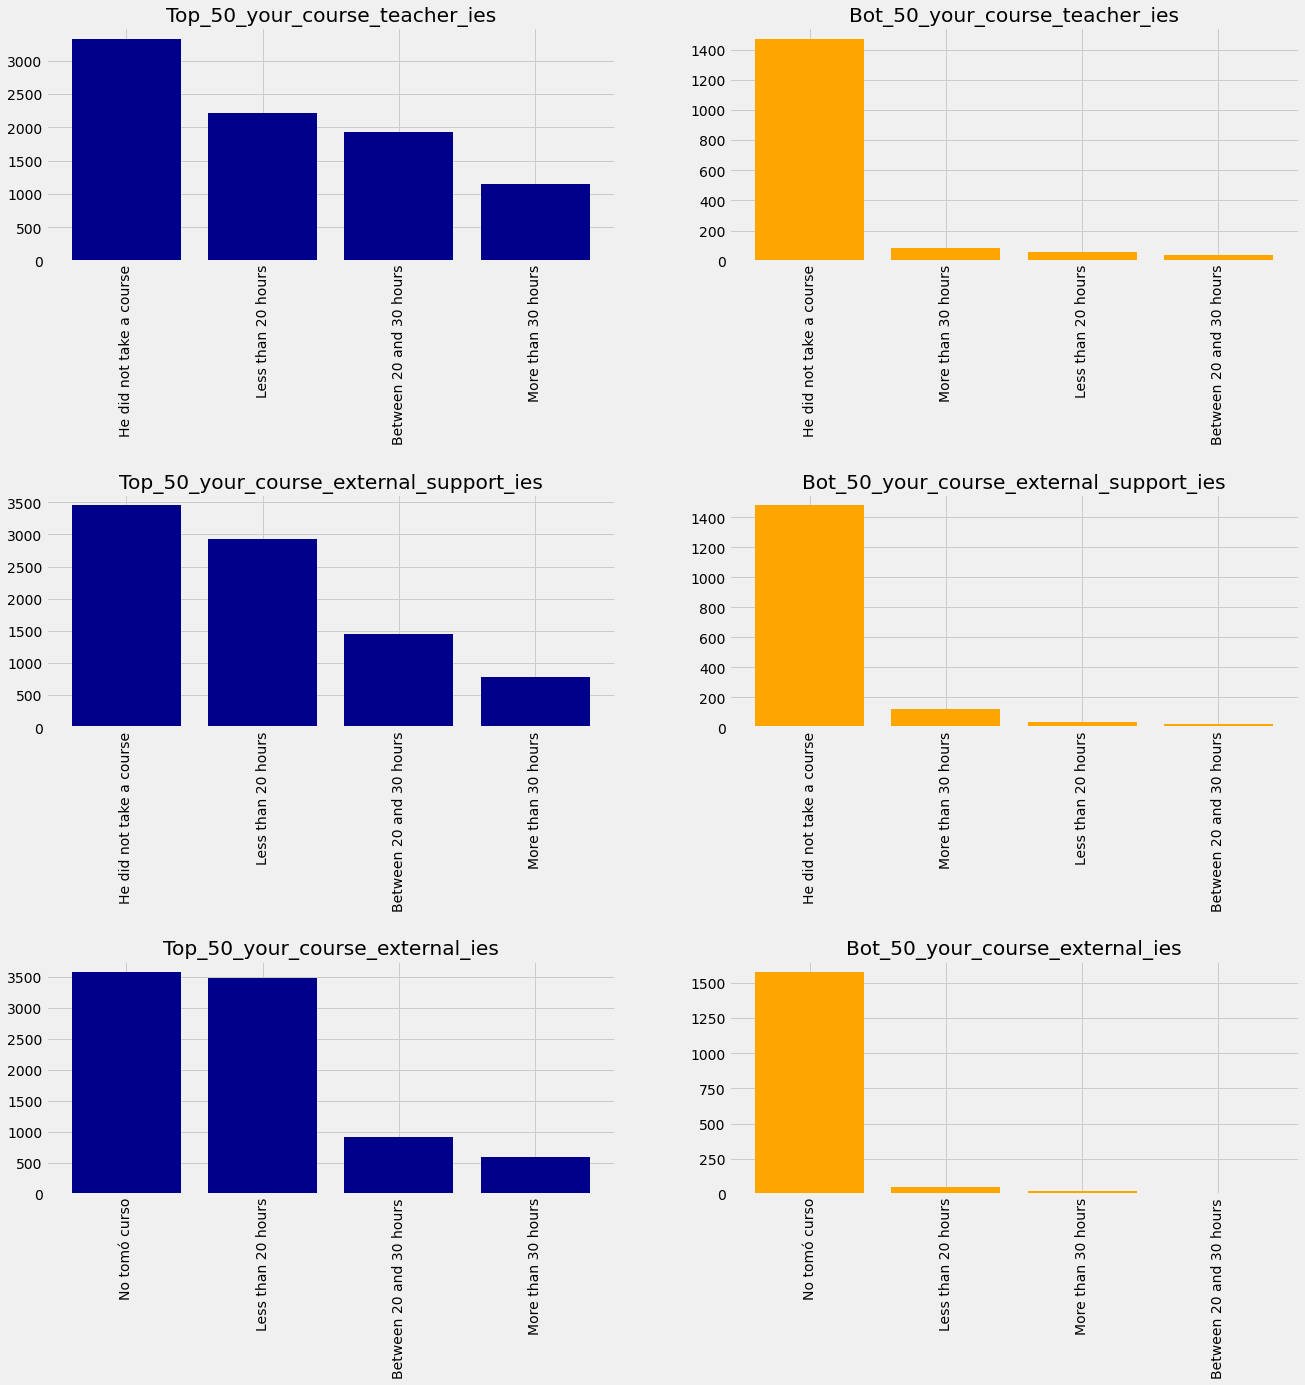

In [25]:
plt.figure(figsize=(20,10))

fig, axs = plt.subplots(3, 2, figsize=(20,20))
plt.subplots_adjust(hspace = 1.0)

top_your_course_teacher_ies = saber_pro_top_50.groupby(saber_pro_top_50['your_course_teacher_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_your_course_external_support_ies = saber_pro_top_50.groupby(saber_pro_top_50['your_course_external_support_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_your_course_external_ies = saber_pro_top_50.groupby(saber_pro_top_50['your_course_external_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,0].bar(top_your_course_teacher_ies.head(5).index, top_your_course_teacher_ies.head(5).values, color='darkblue')
axs[0,0].set_title("Top_50_your_course_teacher_ies")
axs[0,0].tick_params(axis='x', rotation=90)

axs[1,0].bar(top_your_course_external_support_ies.head(5).index, top_your_course_external_support_ies.head(5).values, color='darkblue')
axs[1,0].set_title("Top_50_your_course_external_support_ies")
axs[1,0].tick_params(axis='x', rotation=90)

axs[2,0].bar(top_your_course_external_ies.head(5).index, top_your_course_external_ies.head(5).values, color='darkblue')
axs[2,0].set_title("Top_50_your_course_external_ies")
axs[2,0].tick_params(axis='x', rotation=90)

bot_your_course_teacher_ies = saber_pro_bot_50.groupby(saber_pro_bot_50['your_course_teacher_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_your_course_external_support_ies = saber_pro_bot_50.groupby(saber_pro_bot_50['your_course_external_support_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_your_course_external_ies = saber_pro_bot_50.groupby(saber_pro_bot_50['your_course_external_ies'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,1].bar(bot_your_course_teacher_ies.head(5).index, bot_your_course_teacher_ies.head(5).values, color='orange')
axs[0,1].set_title("Bot_50_your_course_teacher_ies")
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,1].bar(bot_your_course_external_support_ies.head(5).index, bot_your_course_external_support_ies.head(5).values, color='orange')
axs[1,1].set_title("Bot_50_your_course_external_support_ies")
axs[1,1].tick_params(axis='x', rotation=90)

axs[2,1].bar(bot_your_course_external_ies.head(5).index, bot_your_course_external_ies.head(5).values, color='orange')
axs[2,1].set_title("Bot_50_your_course_external_ies")
axs[2,1].tick_params(axis='x', rotation=90)

We can see that when it comes to access to test preparation, top municipalities have more students getting test preparations while bottom municipalities have students who do not have access to preparation tests and it is affecting their mean scores. 

### Parents Education and Occupation

<Figure size 1440x1440 with 0 Axes>

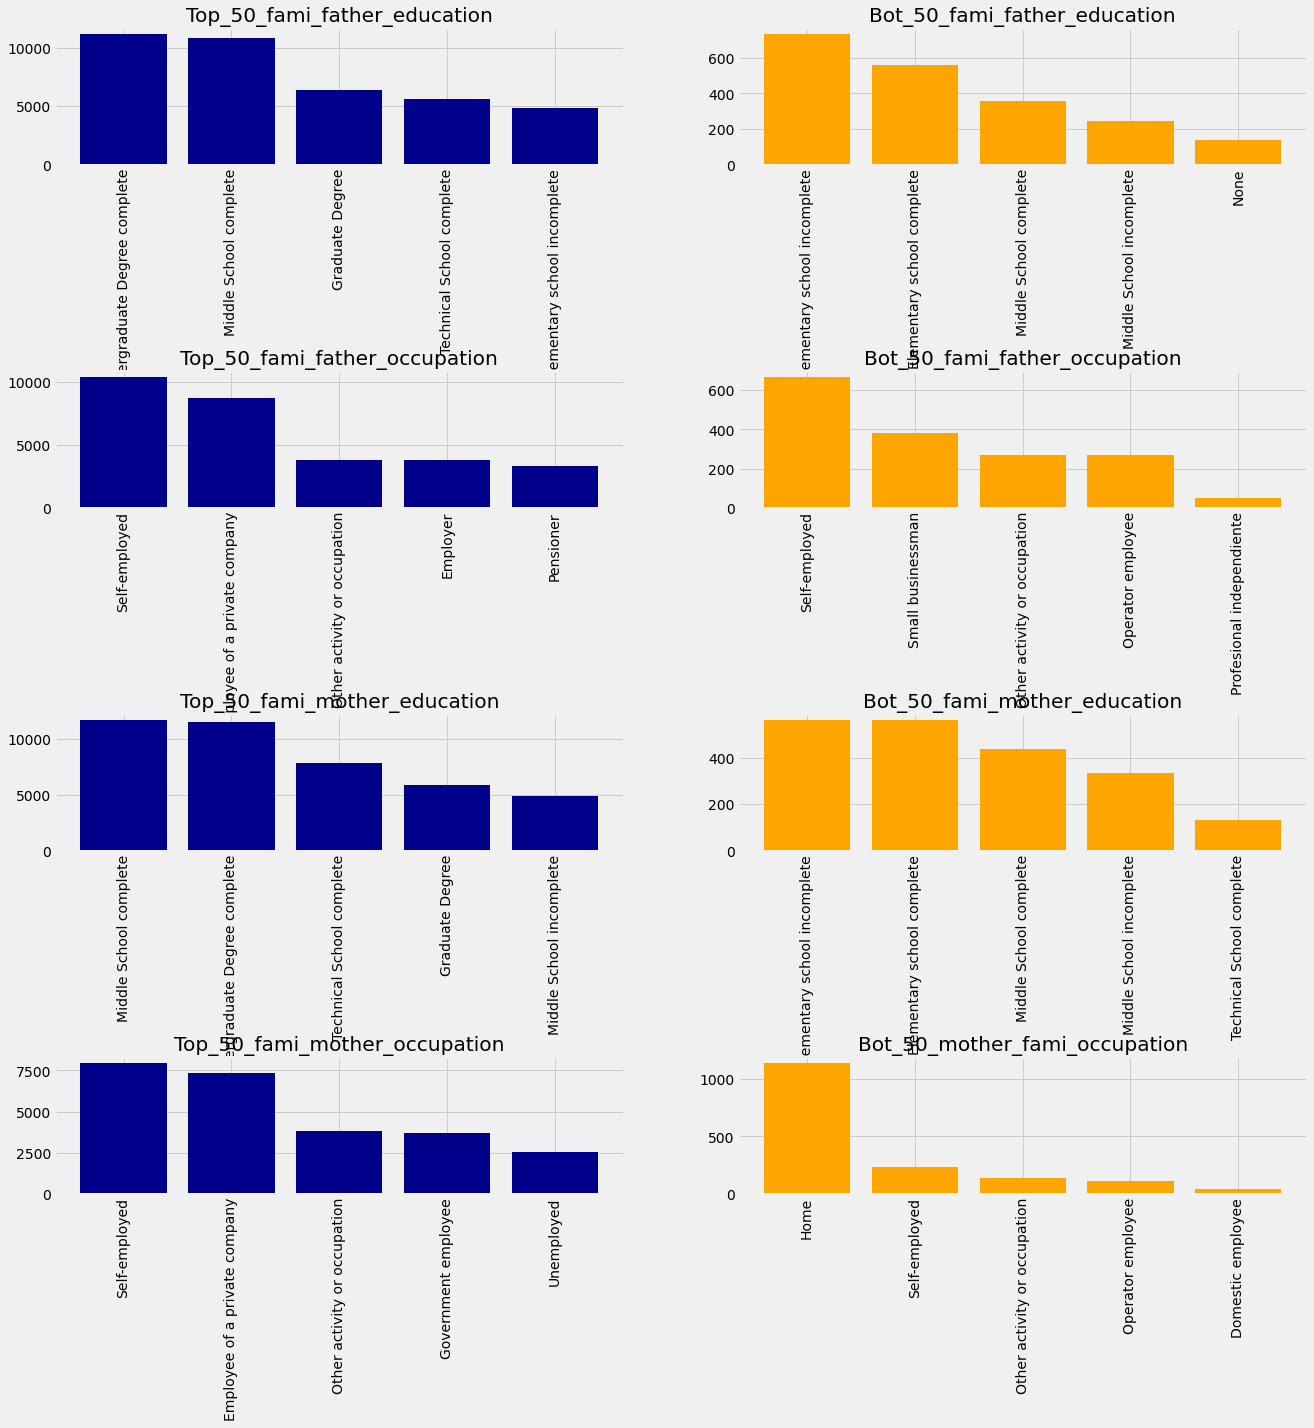

In [26]:
plt.figure(figsize=(20,20))

fig, axs = plt.subplots(4, 2, figsize=(20,20))
plt.subplots_adjust(hspace = 1.5)

top_fami_father_education = saber_pro_top_50.groupby(saber_pro_top_50['fami_father_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_father_occupation = saber_pro_top_50.groupby(saber_pro_top_50['fami_father_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_mother_education = saber_pro_top_50.groupby(saber_pro_top_50['fami_mother_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_mother_occupation = saber_pro_top_50.groupby(saber_pro_top_50['fami_mother_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,0].bar(top_fami_father_education.head(5).index, top_fami_father_education.head(5).values, color='darkblue')
axs[0,0].set_title("Top_50_fami_father_education")
axs[0,0].tick_params(axis='x', rotation=90)

axs[1,0].bar(top_fami_father_occupation.head(5).index, top_fami_father_occupation.head(5).values, color='darkblue')
axs[1,0].set_title("Top_50_fami_father_occupation")
axs[1,0].tick_params(axis='x', rotation=90)

axs[2,0].bar(top_fami_mother_education.head(5).index, top_fami_mother_education.head(5).values, color='darkblue')
axs[2,0].set_title("Top_50_fami_mother_education")
axs[2,0].tick_params(axis='x', rotation=90)

axs[3,0].bar(top_fami_mother_occupation.head(5).index, top_fami_mother_occupation.head(5).values, color='darkblue')
axs[3,0].set_title("Top_50_fami_mother_occupation")
axs[3,0].tick_params(axis='x', rotation=90)

bot_fami_father_education = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_father_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_fami_father_occupation = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_father_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_mother_fami_education = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_mother_education'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_mother_fami_occupation = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_mother_occupation'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,1].bar(bot_fami_father_education.head(5).index, bot_fami_father_education.head(5).values, color='orange')
axs[0,1].set_title("Bot_50_fami_father_education")
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,1].bar(bot_fami_father_occupation.head(5).index, bot_fami_father_occupation.head(5).values, color='orange')
axs[1,1].set_title("Bot_50_fami_father_occupation")
axs[1,1].tick_params(axis='x', rotation=90)

axs[2,1].bar(bot_mother_fami_education.head(5).index, bot_mother_fami_education.head(5).values, color='orange')
axs[2,1].set_title("Bot_50_fami_mother_education")
axs[2,1].tick_params(axis='x', rotation=90)

axs[3,1].bar(bot_mother_fami_occupation.head(5).index, bot_mother_fami_occupation.head(5).values, color='orange')
axs[3,1].set_title("Bot_50_mother_fami_occupation")
axs[3,1].tick_params(axis='x', rotation=90)

 **There is a stark divide shown between the Top and Bottom Municipalities when it comes to Saber Pro scores.** Majority of the bottom municipality students have parents who finished only up to elementary school while majority of Top municipality students have parents who finished Middle and even undergraduate degrees! Moreover, the lack of education of parents trickle down to their occupation. It can be seen that for top municipalities, both parents are working for the family whereas for the bottom munipalities, only the father is working and the mothers are stay at home. 
 
The same distribution holds for saber scores! 

### Access to resources

<Figure size 1440x720 with 0 Axes>

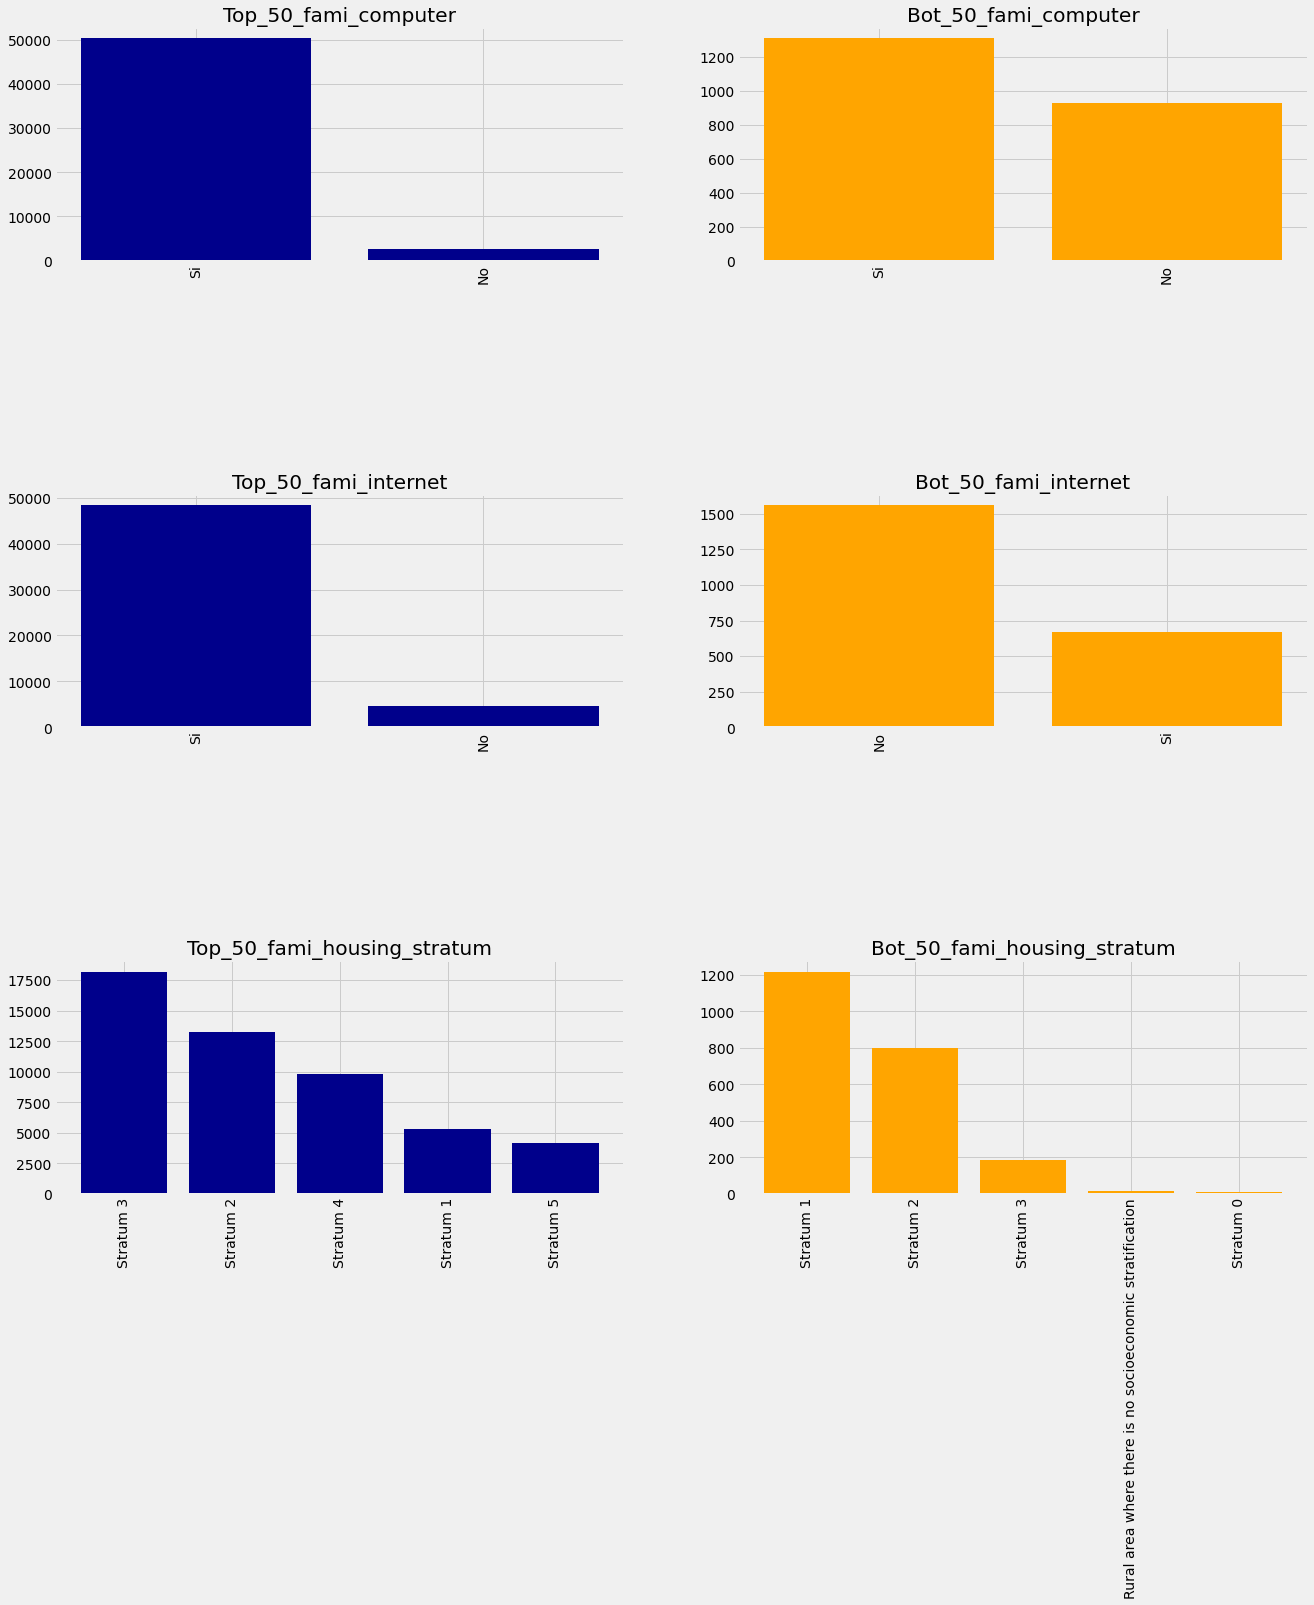

In [27]:
plt.figure(figsize=(20,10))

fig, axs = plt.subplots(3, 2, figsize=(20,20))
plt.subplots_adjust(hspace = 1.0)

top_fami_computer = saber_pro_top_50.groupby(saber_pro_top_50['fami_computer'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_internet = saber_pro_top_50.groupby(saber_pro_top_50['fami_internet'])['total_saber_pro_score'].count().sort_values(ascending=False)
top_fami_housing_stratum = saber_pro_top_50.groupby(saber_pro_top_50['fami_housing_stratum'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,0].bar(top_fami_computer.head(5).index, top_fami_computer.head(5).values, color='darkblue')
axs[0,0].set_title("Top_50_fami_computer")
axs[0,0].tick_params(axis='x', rotation=90)

axs[1,0].bar(top_fami_internet.head(5).index, top_fami_internet.head(5).values, color='darkblue')
axs[1,0].set_title("Top_50_fami_internet")
axs[1,0].tick_params(axis='x', rotation=90)

axs[2,0].bar(top_fami_housing_stratum.head(5).index, top_fami_housing_stratum.head(5).values, color='darkblue')
axs[2,0].set_title("Top_50_fami_housing_stratum")
axs[2,0].tick_params(axis='x', rotation=90)

bot_fami_computer = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_computer'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_fami_internet = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_internet'])['total_saber_pro_score'].count().sort_values(ascending=False)
bot_fami_housing_stratum = saber_pro_bot_50.groupby(saber_pro_bot_50['fami_housing_stratum'])['total_saber_pro_score'].count().sort_values(ascending=False)

axs[0,1].bar(bot_fami_computer.head(5).index, bot_fami_computer.head(5).values, color='orange')
axs[0,1].set_title("Bot_50_fami_computer")
axs[0,1].tick_params(axis='x', rotation=90)

axs[1,1].bar(bot_fami_internet.head(5).index, bot_fami_internet.head(5).values, color='orange')
axs[1,1].set_title("Bot_50_fami_internet")
axs[1,1].tick_params(axis='x', rotation=90)

axs[2,1].bar(bot_fami_housing_stratum.head(5).index, bot_fami_housing_stratum.head(5).values, color='orange')
axs[2,1].set_title("Bot_50_fami_housing_stratum")
axs[2,1].tick_params(axis='x', rotation=90)

There is also a great divide when it comes to access to resources. Majority of the students in the bottom municipalities have computers but **no access to the internet**. This may cause a decrease in Saber pro scores. Furthermore, majority of bottom municipalities' families live on stratum 1 (the lowest) housing level whereas those in the top municipalities live in stratum 3 housing. 

### Subjects to work on: Muncipality level

#### Legend: Green = Lowest subject mark per municipality/department, Scores in Blue = Score lower than the mean of that subject

In [28]:
# Highlighting scores per municipality which fall below the mean for the municipalities per subject
def mean_score_check(x, color):
    return np.where(x < np.mean(x.to_numpy()), f"color: {color};", x)

In [29]:
saber_pro_bot_50.groupby('your_municipality_resides')[saber_pro_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)

,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro
your_municipality_resides,,,,,
AGRADO,42.550000,43.561111,40.305556,43.394444,45.974444
ANOLAIMA,52.700000,54.965000,50.350000,53.220000,54.442500
ANSERMA,46.009091,44.618182,42.298485,48.096970,44.838571
ARANZAZU,33.680645,34.780645,33.500000,33.080645,37.549333
BUENOS AIRES,28.852941,28.305882,33.976471,28.094118,32.703750
CERRITO,60.223529,55.652941,49.623529,54.447059,67.092941
CONCEPCIÓN,24.247059,24.170588,23.758824,25.452941,24.568235
COYAIMA,19.775000,18.460000,18.110000,19.740000,22.002500
FREDONIA,48.350000,49.125000,50.035714,47.639286,49.451429


The scores highlighted in green are the lowest scores per municipality while those colored blue are the scores which fall below the mean!

Therefore, the following municipalities:
- ARANZAZU
- BUENOS AIRES
- CONCEPCION
- COYAIMA
- GUATICA
- LA MERCED
- MANZANARES
- PRADO
- PUERTO CARREÑO	
- PUERTO WILCHES	
- PÁCORA
- RISARALDA
- SAMANÁ
- SAN JOSÉ DEL GUAVIARE	
- SAN RAFAEL	
- TADÓ
- VÉLEZ

are all municipalities who consistently score below the mean of the bottom municipalities! There are the bottom of the bottom municipalities and are recommended to be given special attention!

It is also needed to note that the lowest subject per municipality is the social science subject! It is recommended to work on this subject!


In [30]:
saber_marks = ['score_language_saber_11',
 'score_mathematics_saber_11',
 'score_biology_saber_11',
 'score_chemistry_saber_11',
 'score_physics_saber_11',
 'score_social_science_saber_11',
 'score_philosophy_saber_11',
 'score_english_saber_11']

In [31]:
# Showing lowest marks per bottom 50 municipality 
saber_pro_bot_50.groupby('your_municipality_resides')[saber_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)\
    

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11
your_municipality_resides,,,,,,,,
AGRADO,43.888889,43.444444,45.833333,45.222222,42.277778,41.555556,39.611111,46.111111
ANOLAIMA,48.300000,50.050000,45.850000,49.350000,44.950000,49.250000,42.400000,45.000000
ANSERMA,45.651515,43.969697,44.590909,44.333333,42.727273,44.424242,39.303030,40.893939
ARANZAZU,46.903226,42.935484,44.677419,44.903226,43.838710,44.935484,41.032258,41.580645
BUENOS AIRES,43.411765,43.176471,42.588235,44.647059,40.058824,40.647059,35.705882,37.058824
CERRITO,45.000000,41.882353,44.705882,46.352941,43.294118,41.294118,38.647059,42.764706
CONCEPCIÓN,45.705882,47.294118,42.529412,44.529412,45.176471,43.823529,42.705882,42.176471
COYAIMA,43.000000,38.150000,38.600000,41.650000,41.700000,38.650000,34.550000,37.700000
FREDONIA,45.857143,44.678571,42.392857,42.892857,40.571429,43.750000,38.392857,43.071429


Majority of the lowest scores are from the philosophy and english section! These are both related to literacy and it is then recommended to focus on these subjects! 

### Subjects to work on: Department level

In [32]:
# Showing lowest marks department
saber.groupby('your_dept_resides')[saber_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)

,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11
your_dept_resides,,,,,,,,
AMAZONAS,47.687500,44.281250,45.187500,45.593750,44.906250,44.968750,42.531250,41.281250
ANTIOQUIA,51.970659,52.128493,49.445644,49.514712,48.272604,50.037583,45.031237,52.709800
ARAUCA,47.164062,45.562500,45.863281,45.941406,44.328125,45.515625,40.820312,44.234375
ATLANTICO,50.889175,51.114182,48.909454,49.694730,49.149029,48.751214,44.580905,52.257855
BOGOTA,53.219333,54.505108,51.126950,52.156149,50.572982,51.582033,46.914354,56.926112
BOLIVAR,50.188814,49.543773,48.319612,49.208501,47.931544,48.358986,44.094705,48.479642
BOYACA,50.771358,52.238558,49.608886,50.281083,48.597063,49.943745,44.757056,48.817124
CALDAS,51.037684,51.158548,49.297335,50.097656,48.431526,49.367647,44.875689,50.080653
CAQUETA,48.094925,46.906015,46.679511,47.180451,45.802632,47.192669,41.955827,44.767857


Similar to municipalities, philosophy is the weakest subject even in the department level! It is suggested for this subject to be improved!

In [33]:
# Showing lowest marks department
saber.groupby('your_dept_resides')[saber_pro_marks].mean().style.apply(mean_score_check, color='blue', axis=0)\
                                                                                   .highlight_min(color='lightgreen', axis=1)

,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro
your_dept_resides,,,,,
AMAZONAS,78.784375,83.631250,81.812500,80.081250,88.706250
ANTIOQUIA,121.802279,125.400457,118.108258,127.650767,119.116040
ARAUCA,127.799219,126.125391,119.075781,122.041797,127.533374
ATLANTICO,122.431084,125.557234,117.086097,131.519287,121.539778
BOGOTA,131.324741,132.903255,126.540958,139.859396,128.193800
BOLIVAR,121.863460,126.797032,117.479791,126.958046,123.563663
BOYACA,127.427860,124.366629,118.804500,121.181407,121.200802
CALDAS,111.790740,112.670772,107.151379,111.941108,108.175969
CAQUETA,114.035244,114.050188,109.309211,112.256767,117.526974


Similar to municipality level again, social sciences holds the lowest score per department! It is recommended that this subject be improved.

# Scores by High School Degree

This section illustrates the distribution of students by their high school degree and whether these degrees affect scores. 

In [34]:
saber['your_high_school_degree'].value_counts()

Academic Bachelor                       144212
Technical Bachelor                       59264
Pedagogical or normalist high school      4288
Superior Normalist                        2370
Name: your_high_school_degree, dtype: int64

<AxesSubplot:xlabel='your_high_school_degree'>

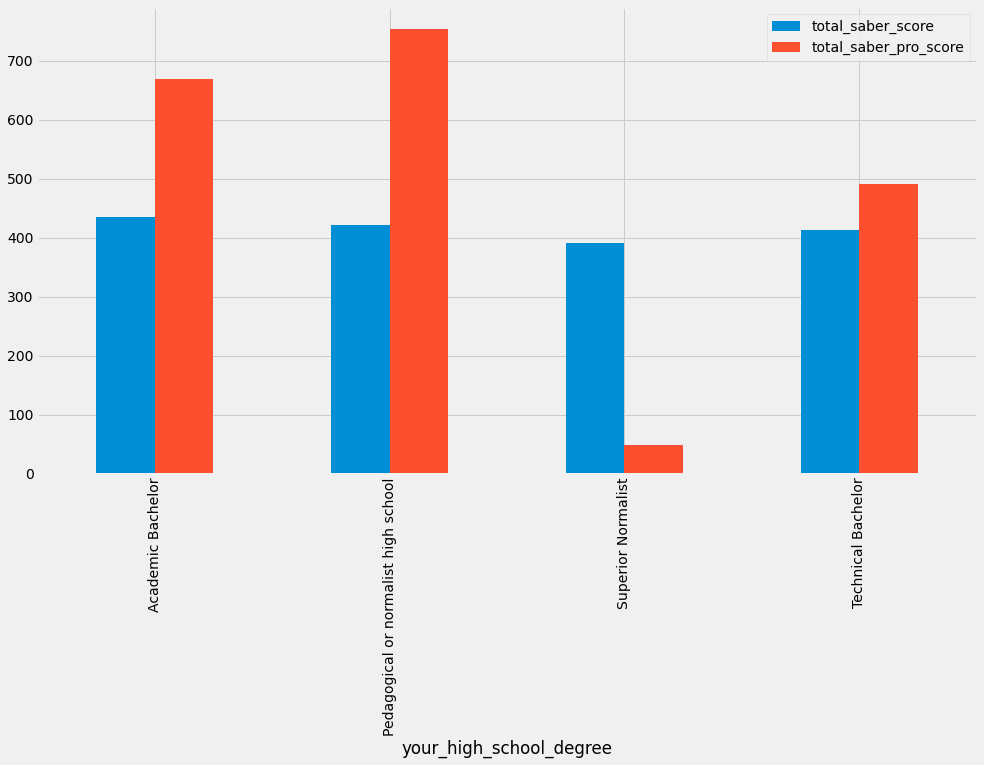

In [35]:
saber.groupby('your_high_school_degree')[total_marks].mean().plot.bar(figsize=(15, 8))

It appears students who had a high school degree of superior normalist and technical bachelor have substantially lower saber pro scores.

### Summary Table for High School Degrees

In [36]:
saber.groupby('your_high_school_degree').agg(
{
'your_course_teacher_ies': lambda x: x.value_counts().index[0],
'your_course_external_ies': lambda x: x.value_counts().index[0],
'your_course_external_support_ies': lambda x: x.value_counts().index[0],
'fami_housing_stratum': lambda x: x.value_counts().index[0],
'fami_internet': lambda x: x.value_counts().index[0],
'fami_computer': lambda x: x.value_counts().index[0],
'fami_automobile': lambda x: x.value_counts().index[0],
'fami_father_education': lambda x: x.value_counts().index[0],
'fami_mother_education': lambda x: x.value_counts().index[0],
'fami_father_occupation': lambda x: x.value_counts().index[0],
'fami_mother_occupation': lambda x: x.value_counts().index[0], 
'fami_housing_stratum': lambda x: x.value_counts().index[0], 
'total_saber_pro_score': 'mean',
'total_saber_score': 'mean'
}).reset_index()

,your_high_school_degree,your_course_teacher_ies,your_course_external_ies,your_course_external_support_ies,fami_housing_stratum,fami_internet,fami_computer,fami_automobile,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,total_saber_pro_score,total_saber_score
0,Academic Bachelor,He did not take a course,No tomó curso,He did not take a course,Stratum 3,Si,Si,No,Middle School complete,Middle School complete,Self-employed,Self-employed,669.461931,434.743544
1,Pedagogical or normalist high school,Less than 20 hours,Less than 20 hours,Less than 20 hours,Stratum 2,Si,Si,No,Middle School complete,Middle School complete,Self-employed,Self-employed,752.938899,421.514459
2,Superior Normalist,He did not take a course,No tomó curso,He did not take a course,Stratum 1,No,Si,No,Elementary school incomplete,Middle School complete,Self-employed,Home,47.801561,390.964979
3,Technical Bachelor,He did not take a course,No tomó curso,He did not take a course,Stratum 2,Si,Si,No,Middle School complete,Middle School complete,Self-employed,Home,491.338676,412.565841


From simply summarizing tabularly, we see students with high school degrees from Superior Normalist and Technical Bachelor have only one working parent, live on lower stratum (1 and 2) housing, and did not have access to preparation tests similar to the characteristics of those in the bottom municipalities!

# Clustering

In [37]:
# # Run this to generate clusters

# # Import module for k-protoype cluster
# from kmodes.kprototypes import KPrototypes

# columns = ['score_language_saber_11',
#  'score_mathematics_saber_11',
#  'score_biology_saber_11',
#  'score_chemistry_saber_11',
#  'score_physics_saber_11',
#  'score_social_science_saber_11',
#  'score_philosophy_saber_11',
#  'score_english_saber_11',
#  'score_optative_saber_11',
#  'score_math_saber_pro',
#  'score_language_saber_pro',
#  'score_social_science_saber_pro',
#  'score_english_saber_pro',
#  'score_writing_saber_pro',
#  'total_saber_score',
#  'total_saber_pro_score',
#  'your_course_teacher_ies',
#  'your_course_external_support_ies',
#  'your_course_external_ies',
#  'fami_housing_stratum',
#  'fami_father_education',
#  'fami_mother_education',
#  'fami_father_occupation',
#  'fami_mother_occupation',
#  'fami_monthly_family_income',
#  'fami_computer',
#  'fami_internet',
#  'fami_automobile',
#  'your_marital_status',
#  'fami_econ_dependents',
#  'your_high_school_degree',
#  'your_undergraduate_core',
#  'your_municipality_resides',
#  'your_prgm_municipality',
#  'your_dept_resides',
#  'your_prgm_department']

# cluster_df = saber[columns]

# cluster_df["your_course_teacher_ies"].fillna("Unknown", inplace=True)
# cluster_df["your_course_external_support_ies"].fillna("Unknown", inplace=True)
# cluster_df["your_course_external_ies"].fillna("Unknown", inplace=True)
# cluster_df['fami_housing_stratum'].fillna("Unknown", inplace=True)
# cluster_df["fami_father_education"].fillna("Unknown", inplace=True)
# cluster_df["fami_mother_education"].fillna("Unknown", inplace=True)
# cluster_df["fami_father_occupation"].fillna("Unknown", inplace=True)
# cluster_df["fami_mother_occupation"].fillna("Unknown", inplace=True)
# cluster_df['fami_internet'].fillna("No", inplace=True)
# cluster_df["fami_computer"].fillna("No", inplace=True)
# cluster_df['fami_automobile'].fillna("Unknown", inplace=True)
# cluster_df["your_marital_status"].fillna("Unknown", inplace=True)
# cluster_df['fami_econ_dependents'].fillna("Unknown", inplace=True)
# cluster_df["your_municipality_resides"].fillna("BOGOTÁ D.C.", inplace=True)
# cluster_df["your_dept_resides"].fillna("BOGOTA", inplace=True)
# cluster_df['your_high_school_degree'].fillna("Academic Bachelor", inplace=True)
# cluster_df["your_undergraduate_core"].fillna("UNCLASSIFIED", inplace=True)
# cluster_df["score_writing_saber_pro"].fillna(cluster_df['score_writing_saber_pro'].median(), inplace=True)
# cluster_df["fami_monthly_family_income"].fillna("Unknown", inplace=True)

# catColumnsPos = [cluster_df.columns.get_loc(col) for col in list(cluster_df.select_dtypes('object').columns)]
# print('Categorical columns           : {}'.format(list(cluster_df.select_dtypes('object').columns)))
# print('Categorical columns position  : {}'.format(catColumnsPos))

# dfMatrix = cluster_df.to_numpy()
# dfMatrix

# # Fit the cluster
# kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
# kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

# # Add the cluster to the dataframe
# cluster_df['Cluster Labels'] = kprototype.labels_
# cluster_df['Segment'] = cluster_df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

# cluster_df.to_csv("Saber Cluster All.csv")

In [38]:
df = pd.read_csv("Saber Cluster All.csv")

<AxesSubplot:xlabel='total_saber_score', ylabel='total_saber_pro_score'>

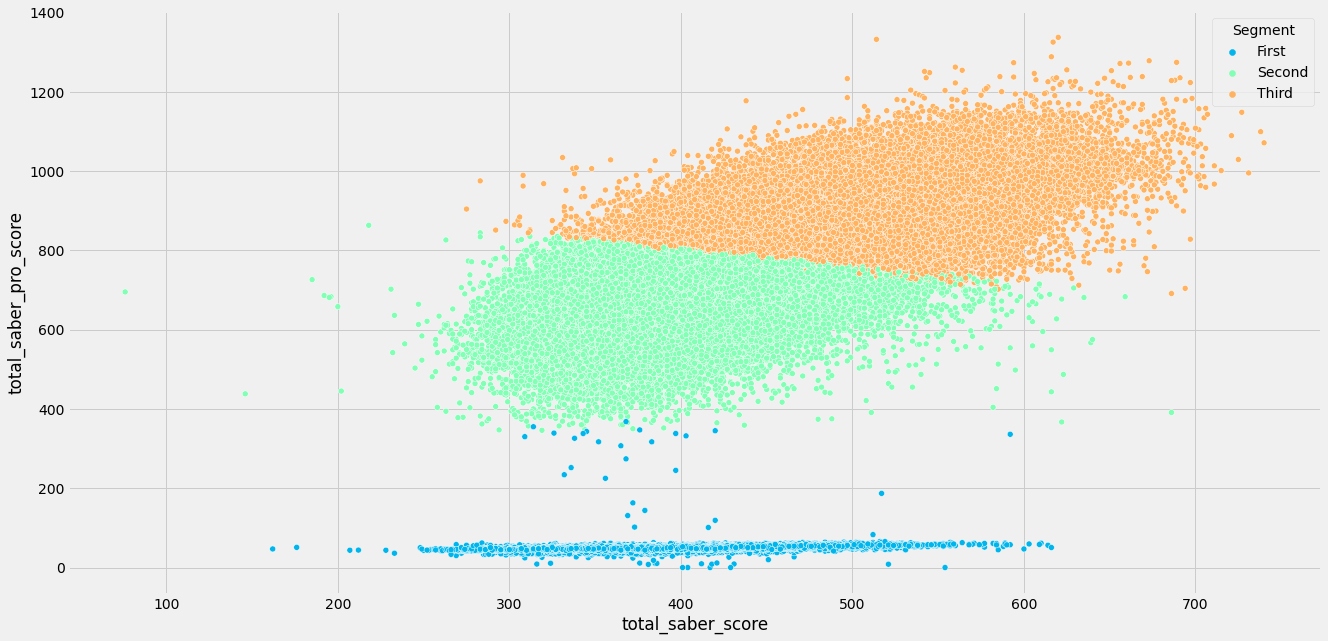

In [39]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'total_saber_score', y = 'total_saber_pro_score', hue='Segment', data=df, palette='rainbow')

In [40]:
df.head()

,Unnamed: 0,score_language_saber_11,score_mathematics_saber_11,score_biology_saber_11,score_chemistry_saber_11,score_physics_saber_11,score_social_science_saber_11,score_philosophy_saber_11,score_english_saber_11,score_optative_saber_11,score_math_saber_pro,score_language_saber_pro,score_social_science_saber_pro,score_english_saber_pro,score_writing_saber_pro,total_saber_score,total_saber_pro_score,your_course_teacher_ies,your_course_external_support_ies,your_course_external_ies,fami_housing_stratum,fami_father_education,fami_mother_education,fami_father_occupation,fami_mother_occupation,fami_monthly_family_income,fami_computer,fami_internet,fami_automobile,your_marital_status,fami_econ_dependents,your_high_school_degree,your_undergraduate_core,your_municipality_resides,your_prgm_municipality,your_dept_resides,your_prgm_department,Cluster Labels,Segment
0,0,32.0,43.0,39.0,42.0,33.0,33.0,29.0,38.0,49.0,9.6,8.3,8.2,9.4,9.4,338.0,44.9,Unknown,Unknown,Unknown,Stratum 3,Undergraduate Degree complete,Middle School complete,Profesional independiente,Profesional independiente,Between 3 and less than 5 SMLV,No,Si,No,Single,None,Technical Bachelor,PUBLIC ACCOUNTING,GUATEQUE,BOGOTÁ D.C.,BOYACA,BOGOTA,0,First
1,1,48.0,64.0,52.0,52.0,54.0,44.0,47.0,51.0,6.0,10.8,10.1,11.4,9.6,10.4,418.0,52.3,Between 20 and 30 hours,Between 20 and 30 hours,No tomó curso,Stratum 2,Middle School complete,Technical School complete,Empleado de nivel auxiliar o administrativo,Self-employed,Between 2 and less than 3 SMLV,Si,No,Si,Single,None,Academic Bachelor,MILITARY OR POLICE TRAINING,LETICIA,BOGOTÁ D.C.,AMAZONAS,BOGOTA,0,First
2,2,57.0,42.0,50.0,51.0,28.0,46.0,45.0,43.0,5.0,10.6,11.2,10.4,9.5,9.9,367.0,51.6,He did not take a course,He did not take a course,No tomó curso,Stratum 2,Elementary school incomplete,Elementary school incomplete,Other activity or occupation,Home,Less than 1 SMLV,No,No,No,Single,None,Technical Bachelor,PUBLIC ACCOUNTING,DOSQUEBRADAS,PEREIRA,RISARALDA,RISARALDA,0,First
3,3,40.0,46.0,34.0,35.0,45.0,42.0,40.0,43.0,29.0,9.3,8.2,9.2,9.5,9.4,354.0,45.6,He did not take a course,He did not take a course,No tomó curso,Stratum 1,Technical School complete,Middle School complete,Other activity or occupation,Empleado de nivel auxiliar o administrativo,Less than 1 SMLV,No,No,No,Single,None,Technical Bachelor,ECONOMY,CARTAGENA DE INDIAS,CARTAGENA DE INDIAS,BOLIVAR,BOLIVAR,0,First
4,4,48.0,44.0,57.0,65.0,44.0,49.0,43.0,42.0,55.0,145.0,179.0,118.0,132.0,138.0,447.0,712.0,Unknown,Unknown,Unknown,Stratum 3,Elementary school complete,Middle School complete,Does not apply,Does not apply,Unknown,Si,Si,No,Unknown,None,Technical Bachelor,ADMINISTRATION,SOACHA,"BOGOTÁ, D.C.",CUNDINAMARCA,BOGOTA,1,Second


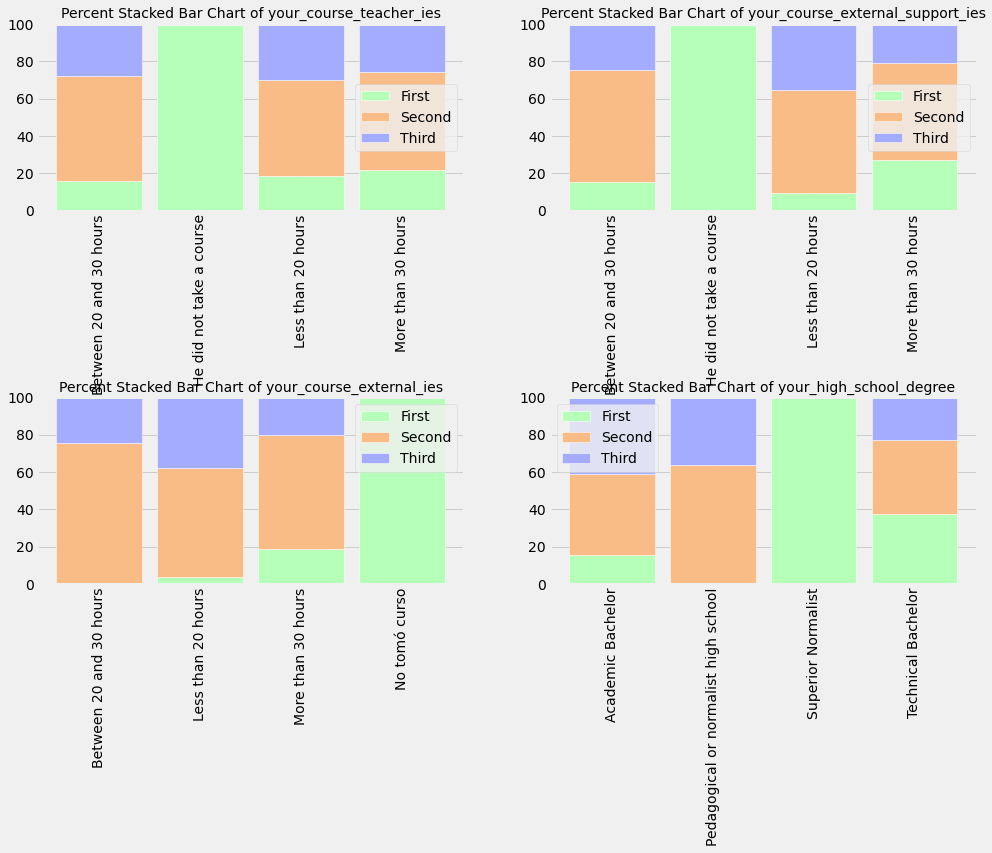

In [41]:
columns = ['your_course_teacher_ies', 'your_course_external_support_ies', 'your_course_external_ies', 'your_high_school_degree']
cols = 2
rows = len(columns) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15,16), sharex=False) #subplot with all rows
plt.subplots_adjust(hspace = 1)
i=0

# Set threshold: arbitraty number set by inspection
threshold = 500.0
barWidth = 0.85
#Reference code: https://www.python-graph-gallery.com/13-percent-stacked-barplot

for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            # Remove unncessary values like Not apply or Unknown
            data = df[(df[columns[i]] != "Not apply") & (df[columns[i]] != "Unknown")]
            
            # Group data
            data = data.groupby([data[columns[i]],'Segment'])['Cluster Labels'].count().unstack().reset_index()
            data.fillna(0, inplace=True)
            
            # Creating total column
            data['Total'] = data['First'] + data['Second'] + data['Third']
            
            # Removing categories with not enough datapoints 
            # We do not want to get a misinterpretation of data with small size
            data = data[data['Total'] > threshold]
            
            # From raw value to percentage
            totals = [i+j+k for i,j,k in zip(data['First'], data['Second'], data['Third'])]
            First = [i / j * 100 for i,j in zip(data['First'], totals)]
            Second = [i / j * 100 for i,j in zip(data['Second'], totals)]
            Third = [i / j * 100 for i,j in zip(data['Third'], totals)]
    
            # Create green Bars
            axs[r,c].bar(data[columns[i]].values, First, color='#b5ffb9', edgecolor='white', width=barWidth, label="First")
            # Create orange Bars
            axs[r,c].bar(data[columns[i]].values, Second, bottom=First, color='#f9bc86', edgecolor='white', width=barWidth, label="Second")
            # Create blue Bars
            axs[r,c].bar(data[columns[i]].values, Third, bottom=[i+j for i,j in zip(First, Second)], color='#a3acff', edgecolor='white', width=barWidth, label="Third")
            axs[r,c].tick_params(axis='x', rotation=90)
            axs[r,c].legend()
            axs[r,c].set_title("Percent Stacked Bar Chart of {}".format(columns[i]), fontsize=14)
        i+=1

plt.show();

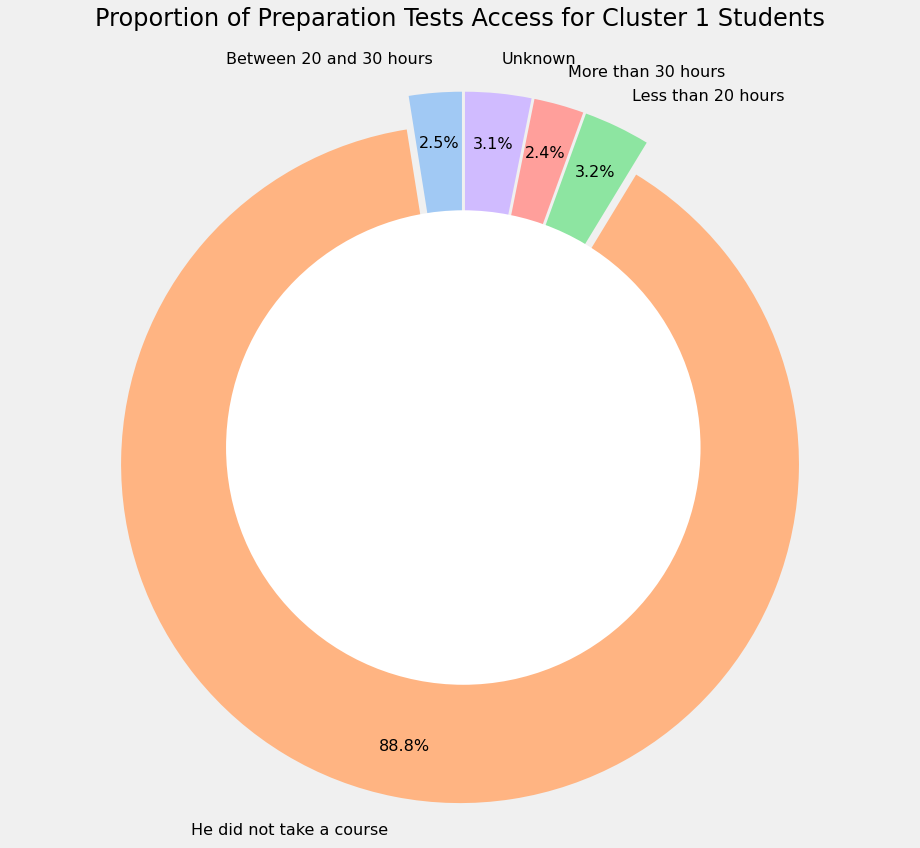

In [42]:
# Creating pie chart for course preparation

pie_chart = df[df['Segment'] == 'First']
pie_chart = pie_chart.groupby("your_course_teacher_ies")[['Cluster Labels']].count()
pie_chart['Percentage'] = pie_chart['Cluster Labels'] / pie_chart.sum(axis=0).values[0] * 100

# Pie chart
labels = pie_chart.index.to_list()
sizes  = pie_chart['Percentage'].values

#explosion
explode = (0.05,0.05,0.05,0.05, 0.05)

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(13,12))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, textprops={'fontsize': 16})

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Proportion of Preparation Tests Access for Cluster 1 Students", fontsize = 24, pad = 30)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Insights

## $89\%$ of students belonging to Cluster 1 did not have access to a test preparation!

There is a great degree of difference in Test preparation between Cluster 1 and Clusters 2 and 3. 

It should also be noted the entire populace of students graduating from <code> Superior Normalist </code> are from the First Cluster. Referring back to the analysis on high school degrees, Superior Normalist schools hold the lowest of scores among all degrees!

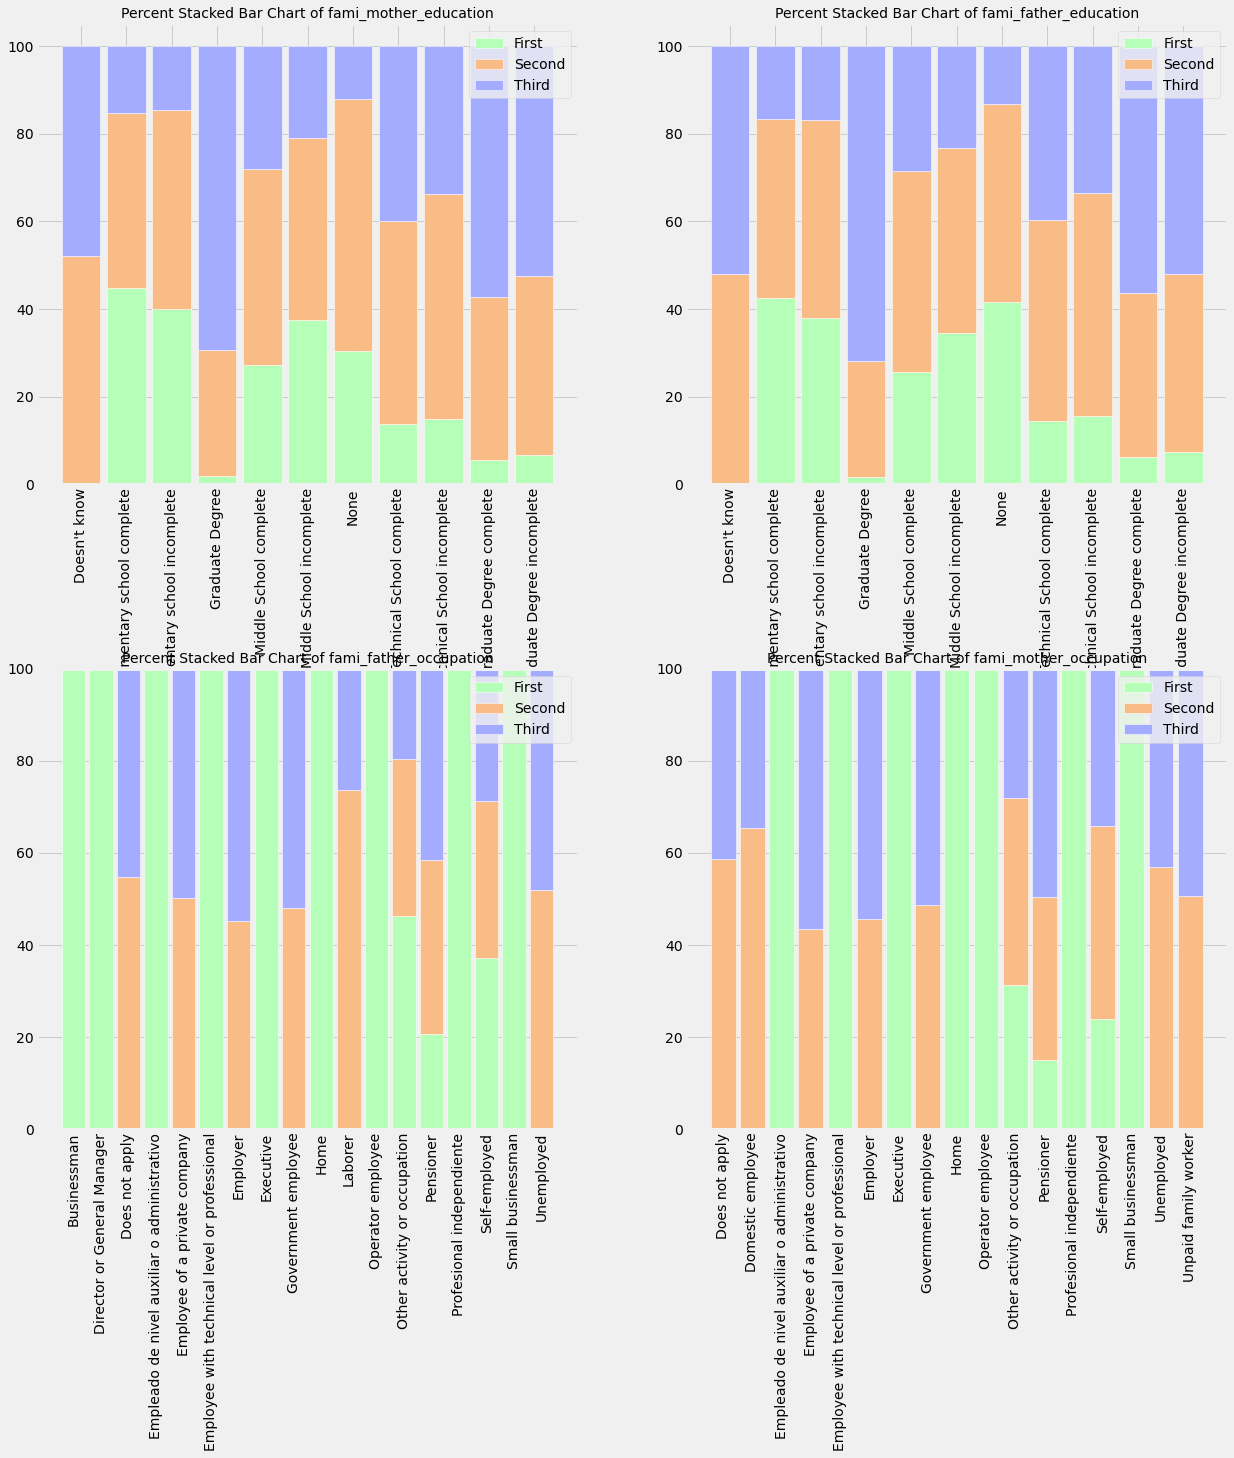

In [43]:
columns = ['fami_mother_education', 'fami_father_education', 'fami_father_occupation', 'fami_mother_occupation']
cols = 2
rows = len(columns) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(19,30), sharex=False) #subplot with all rows
plt.subplots_adjust(hspace = 0.4)
i=0

# Set threshold: arbitraty number set by inspection
threshold = 500.0

#Reference code: https://www.python-graph-gallery.com/13-percent-stacked-barplot

for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            # Remove unncessary values like Not apply or Unknown
            data = df[(df[columns[i]] != "Not apply") & (df[columns[i]] != "Unknown")]
            
            # Group data
            data = data.groupby([data[columns[i]],'Segment'])['Cluster Labels'].count().unstack().reset_index()
            data.fillna(0, inplace=True)
            
            # Creating total column
            data['Total'] = data['First'] + data['Second'] + data['Third']
            
            # Removing categories with not enough datapoints 
            # We do not want to get a misinterpretation of data with small size
            data = data[data['Total'] > threshold]
            
            # From raw value to percentage
            totals = [i+j+k for i,j,k in zip(data['First'], data['Second'], data['Third'])]
            First = [i / j * 100 for i,j in zip(data['First'], totals)]
            Second = [i / j * 100 for i,j in zip(data['Second'], totals)]
            Third = [i / j * 100 for i,j in zip(data['Third'], totals)]
    
            # Create green Bars
            axs[r,c].bar(data[columns[i]].values, First, color='#b5ffb9', edgecolor='white', width=barWidth, label="First")
            # Create orange Bars
            axs[r,c].bar(data[columns[i]].values, Second, bottom=First, color='#f9bc86', edgecolor='white', width=barWidth, label="Second")
            # Create blue Bars
            axs[r,c].bar(data[columns[i]].values, Third, bottom=[i+j for i,j in zip(First, Second)], color='#a3acff', edgecolor='white', width=barWidth, label="Third")
            axs[r,c].tick_params(axis='x', rotation=90)
            axs[r,c].legend()
            axs[r,c].set_title("Percent Stacked Bar Chart of {}".format(columns[i]), fontsize=14)
        i+=1

plt.show();

#### Insights on parents' education

### Approximately $70\%$ of Graduate Degrees Holders and $58\%$ of Undergraduate Degree holders belong to Cluster 3 students' parents. 

### Cluster 2 parents have a majority on Middle School Complete and Middle School Incomplete at about $40\%$ and Technical School Complete and Technical School Incomplete at about $40\%$

### Approximately $42\%$ of Elementary School Completers and $40\%$ of Elementary School Incomplete belong to Cluster 1 student's parents.

Summary: 

Cluster 1 parents: **Graduate and Undergraduate degree holders** <br>
Cluster 2 parents: **Middle school and technical school completers and incompleters** <br>
Cluster 3 parents: **Elementary school completers and incompleters** <br>

#### Insights on parents' occupation

### Cluster 1 father and mother occupations include: businessman, director or general manager, administrativo, technical employee, home, operator employee, and independent professional. 

This result could mean the parents of Cluster 1 students either belong to jobs that require a lot of time to work (executives, businessman) or have no work at all (stay at home). This could lead to a situation where parents have no time for their kids because they work such hour-intensive jobs or have no jobs but stay at home. For this, however, more data outside the dataset is needed.

### Clusters 2 and 3 are a mix of private employees, government employees, laborers, and other jobs not mentioned in the dataset. 

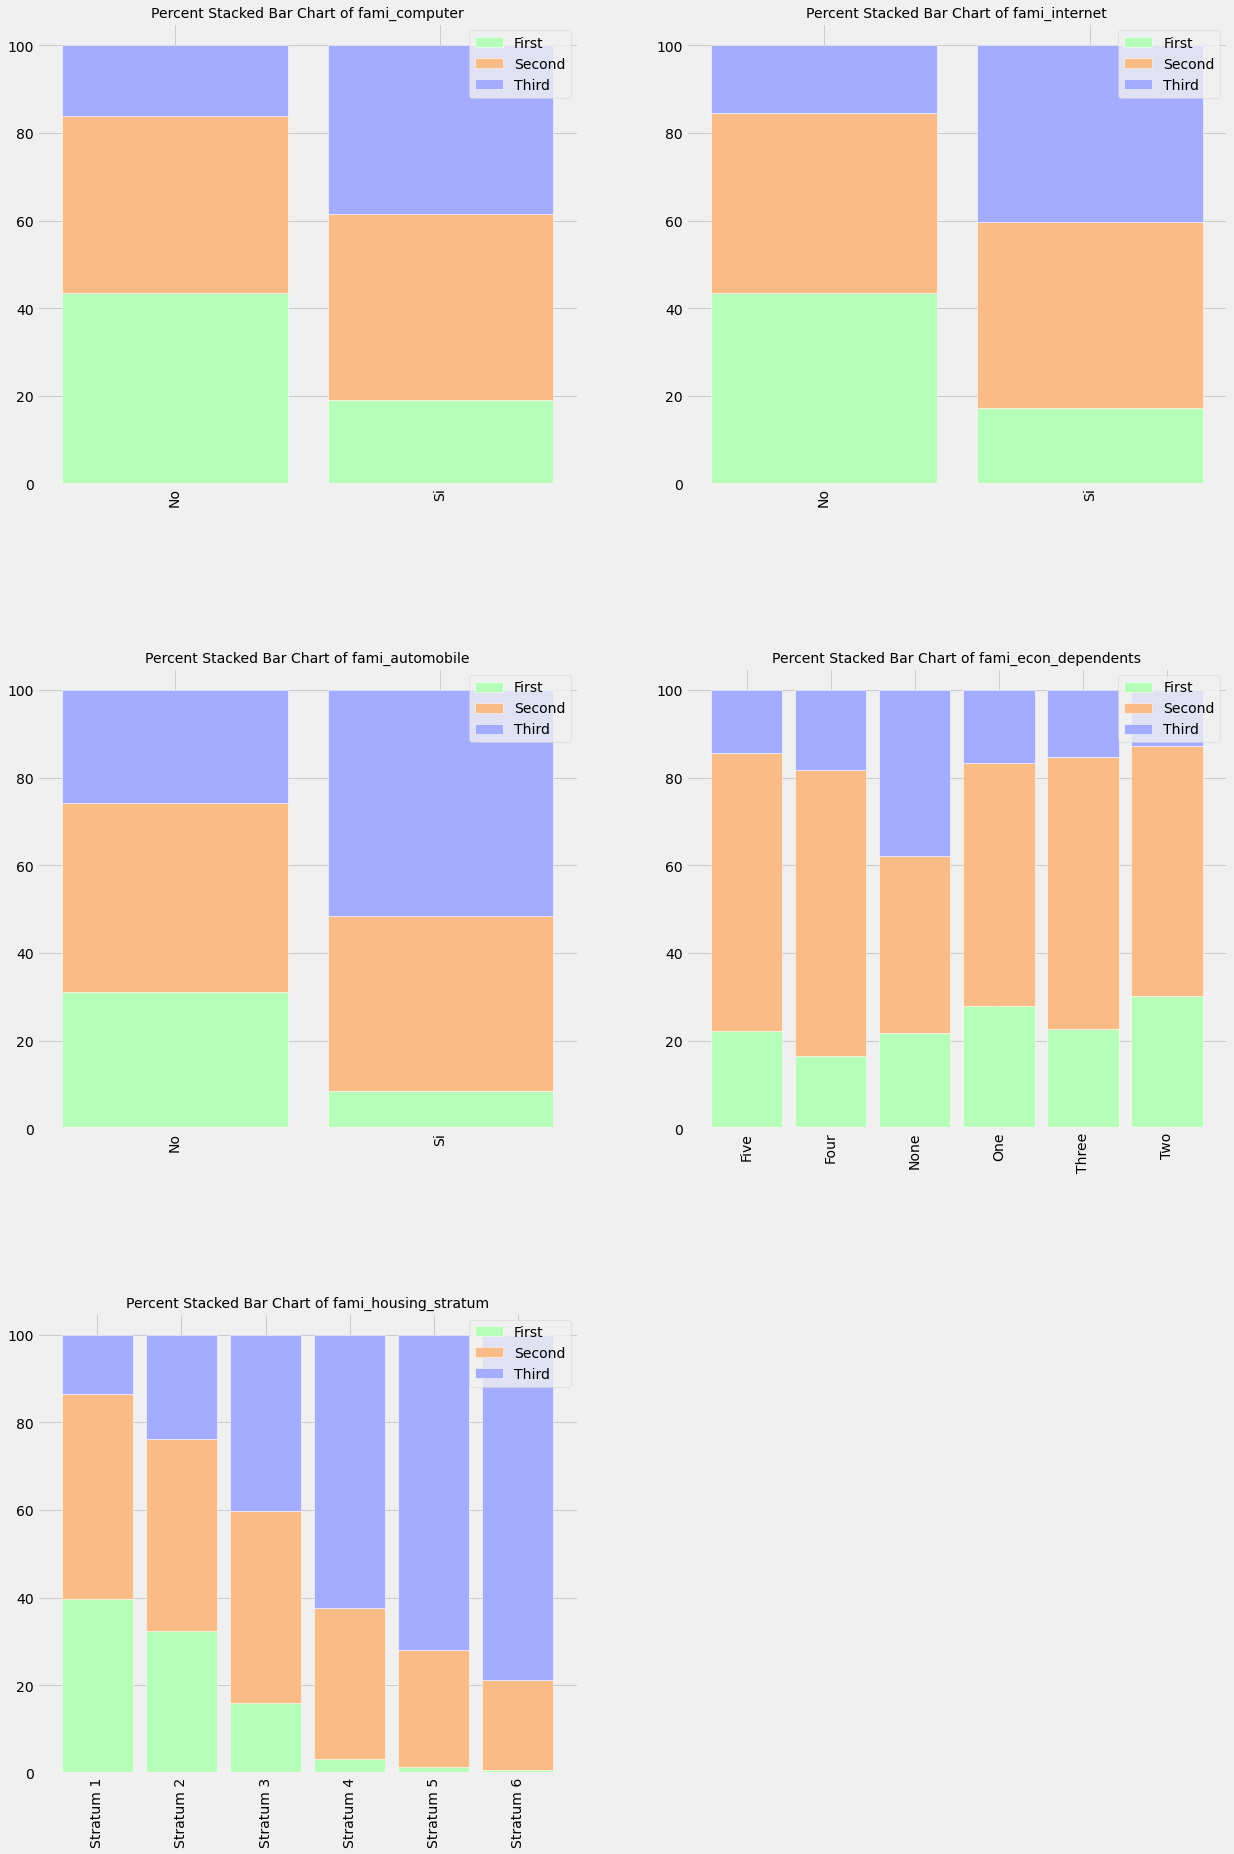

In [44]:
columns = ['fami_computer', 'fami_internet', 'fami_automobile', 'fami_econ_dependents', 'fami_housing_stratum']
cols = 2
rows = len(columns) // cols+1
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(19,30), sharex=False) #subplot with all rows
plt.subplots_adjust(hspace = 0.4)
i=0

# Set threshold: arbitraty number set by inspection
threshold = 500.0

#Reference code: https://www.python-graph-gallery.com/13-percent-stacked-barplot

for r in np.arange(0, rows, 1):
    for c in np.arange(0, cols, 1):
        if i >= len(columns):
            axs[r, c].set_visible(False)
        else:
            # Remove unncessary values like Not apply or Unknown
            data = df[(df[columns[i]] != "Not apply") & (df[columns[i]] != "Unknown")]
            
            # Group data
            data = data.groupby([data[columns[i]],'Segment'])['Cluster Labels'].count().unstack().reset_index()
            data.fillna(0, inplace=True)
            
            # Creating total column
            data['Total'] = data['First'] + data['Second'] + data['Third']
            
            # Removing categories with not enough datapoints 
            # We do not want to get a misinterpretation of data with small size
            data = data[data['Total'] > threshold]
            
            # From raw value to percentage
            totals = [i+j+k for i,j,k in zip(data['First'], data['Second'], data['Third'])]
            First = [i / j * 100 for i,j in zip(data['First'], totals)]
            Second = [i / j * 100 for i,j in zip(data['Second'], totals)]
            Third = [i / j * 100 for i,j in zip(data['Third'], totals)]
    
            # Create green Bars
            axs[r,c].bar(data[columns[i]].values, First, color='#b5ffb9', edgecolor='white', width=barWidth, label="First")
            # Create orange Bars
            axs[r,c].bar(data[columns[i]].values, Second, bottom=First, color='#f9bc86', edgecolor='white', width=barWidth, label="Second")
            # Create blue Bars
            axs[r,c].bar(data[columns[i]].values, Third, bottom=[i+j for i,j in zip(First, Second)], color='#a3acff', edgecolor='white', width=barWidth, label="Third")
            axs[r,c].tick_params(axis='x', rotation=90)
            axs[r,c].legend()
            axs[r,c].set_title("Percent Stacked Bar Chart of {}".format(columns[i]), fontsize=14)
        i+=1

plt.show();

### Approximately $42\%$ of those without computer and internet belong to Cluster 1, 40% belong to Cluster 2, and 18% belong to Cluster 3

### Majority of the econ dependents belong to Cluster 2 students. This can mean these students have a big family size as compared to other Clusters. In opposition, Cluster 1 students have a low percentage of econ dependents and approximately $38\%$ of those without any dependents belong to cluster 1. This could mean these families have a low family size. Cluster 1 averages to about $20\%$ of econ dependents.  Cluster 1 students then have low to medium family sizes.

### A stark divide is seen in housing stratums! $78\%$ of stratum 6 housing belong to Cluster 3 students while $22\%$ belong to Cluster 2 students. Almost no Cluster 3 students belong to Stratum 4-6 housing and $40\%$ of Stratum 1 housing belong to Cluster 1 students and $32\%$ of stratum 2 housing belong to Cluster 2 students. This shows a great divide between Cluster 1 and Cluster 2 and even more so with Cluster 1 to Cluster 3. 

Text(0.5, 1.0, 'Percent Stacked Bar Chart of your_undergraduate_core')

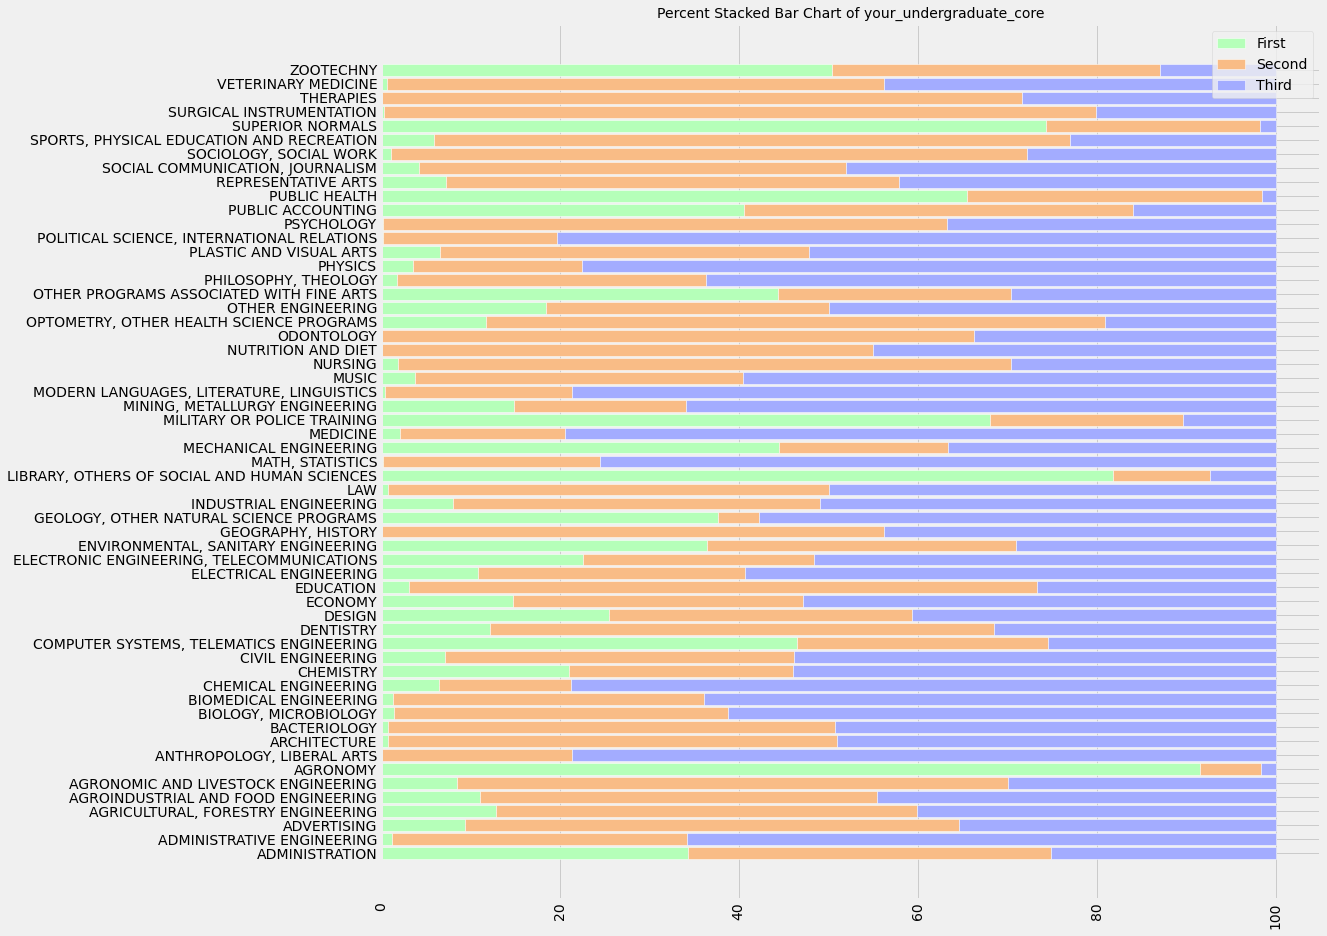

In [45]:
# Remove unncessary values like Not apply or Unknown
data = df[(df['your_undergraduate_core'] != "UNCLASSIFIED")]

threshold = 150
# Group data
data = data.groupby([data['your_undergraduate_core'],'Segment'])['Cluster Labels'].count().unstack().reset_index()
data.fillna(0, inplace=True)
            
# Creating total column
data['Total'] = data['First'] + data['Second'] + data['Third']
            
# Removing categories with not enough datapoints 
# We do not want to get a misinterpretation of data with small size
data = data[data['Total'] > threshold]
            
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(data['First'], data['Second'], data['Third'])]
First = [i / j * 100 for i,j in zip(data['First'], totals)]
Second = [i / j * 100 for i,j in zip(data['Second'], totals)]
Third = [i / j * 100 for i,j in zip(data['Third'], totals)]

plt.figure(figsize=(15,15))
# Create green Bars
plt.barh(data['your_undergraduate_core'].values, First, color='#b5ffb9', edgecolor='white', height=barWidth, label="First")
# Create orange Bars
plt.barh(data['your_undergraduate_core'].values, Second, left=First, color='#f9bc86', edgecolor='white', height=barWidth, label="Second")
# Create blue Bars
plt.barh(data['your_undergraduate_core'].values, Third, left=[i+j for i,j in zip(First, Second)], color='#a3acff', edgecolor='white', height=barWidth, label="Third")
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.title("Percent Stacked Bar Chart of {}".format('your_undergraduate_core'), fontsize=14)

In [46]:
cores = pd.concat([pd.Series(data['your_undergraduate_core'].values), pd.Series(First)], axis=1)
cores = pd.concat([cores, pd.Series(Second)], axis=1, ignore_index=True)
cores = pd.concat([cores, pd.Series(Third)], axis=1, ignore_index=True)
cores = cores.rename(columns={0:'your_undergraduate_core', 1:'First', 2:'Second', 3:'Third'})

first_courses = cores[cores['First'] > 50.0]['your_undergraduate_core'].to_list()
second_courses = cores[cores['Second'] > 50.0]['your_undergraduate_core'].to_list()
third_courses = cores[cores['Third'] > 50.0]['your_undergraduate_core'].to_list()

print("\nThe courses in which majority of the First Cluster students attend to are {}".format(first_courses))
print("\nThe courses in which majority of the Second Cluster students attend to are {}".format(second_courses))
print("\nThe courses in which majority of the Third Cluster students attend to are {}".format(third_courses))


The courses in which majority of the First Cluster students attend to are ['AGRONOMY', 'LIBRARY, OTHERS OF SOCIAL AND HUMAN SCIENCES', 'MILITARY OR POLICE TRAINING', 'PUBLIC HEALTH', 'SUPERIOR NORMALS', 'ZOOTECHNY']

The courses in which majority of the Second Cluster students attend to are ['ADVERTISING', 'AGRONOMIC AND LIVESTOCK ENGINEERING', 'ARCHITECTURE', 'DENTISTRY', 'EDUCATION', 'GEOGRAPHY, HISTORY', 'NURSING', 'NUTRITION AND DIET', 'ODONTOLOGY', 'OPTOMETRY, OTHER HEALTH SCIENCE PROGRAMS', 'PSYCHOLOGY', 'REPRESENTATIVE ARTS', 'SOCIOLOGY, SOCIAL WORK', 'SPORTS, PHYSICAL EDUCATION AND RECREATION', 'SURGICAL INSTRUMENTATION', 'THERAPIES', 'VETERINARY MEDICINE']

The courses in which majority of the Third Cluster students attend to are ['ADMINISTRATIVE ENGINEERING', 'ANTHROPOLOGY, LIBERAL ARTS', 'BIOLOGY, MICROBIOLOGY', 'BIOMEDICAL ENGINEERING', 'CHEMICAL ENGINEERING', 'CHEMISTRY', 'CIVIL ENGINEERING', 'ECONOMY', 'ELECTRICAL ENGINEERING', 'ELECTRONIC ENGINEERING, TELECOMMUNICATIONS

In [47]:
# Sorting by rank

sorted_mean_undergraduate_core = df.groupby("your_undergraduate_core")[['total_saber_score']].mean().sort_values(by='total_saber_score', ascending=False).reset_index()
sorted_mean_undergraduate_core = sorted_mean_undergraduate_core.reset_index()
sorted_mean_undergraduate_core = sorted_mean_undergraduate_core.rename(columns = {'index':'rank'})
sorted_mean_undergraduate_core['rank'] = sorted_mean_undergraduate_core['rank'] + 1

# Getting the ranks of courses for first cluster students 
first_cluster_rank = sorted_mean_undergraduate_core.loc[sorted_mean_undergraduate_core['your_undergraduate_core'].isin(first_courses)]
first_cluster_rank = first_cluster_rank.merge(cores[cores['First'] > 50.0][['your_undergraduate_core','First']], how='inner', on='your_undergraduate_core')
first_cluster_rank.rename(columns={'First':'proportion'}, inplace=True)
first_cluster_rank.set_index('rank', inplace=True)
first_cluster_rank

,your_undergraduate_core,total_saber_score,proportion
rank,,,
52,ZOOTECHNY,399.748677,50.396825
54,MILITARY OR POLICE TRAINING,392.738819,68.059072
55,SUPERIOR NORMALS,387.223352,74.350282
56,PUBLIC HEALTH,386.750865,65.484429
57,"LIBRARY, OTHERS OF SOCIAL AND HUMAN SCIENCES",386.150943,81.886792
58,AGRONOMY,385.854525,91.504720


### The courses in which Cluster 1 students hold the majority are the lowest ranking courses! This shows Cluster 1 students take courses with low mean scores. 

In [48]:
# Getting the ranks of courses for second cluster students
second_cluster_rank = sorted_mean_undergraduate_core.loc[sorted_mean_undergraduate_core['your_undergraduate_core'].isin(second_courses)]
second_cluster_rank = second_cluster_rank.merge(cores[cores['Second'] > 50.0][['your_undergraduate_core','Second']], how='inner', on='your_undergraduate_core')
second_cluster_rank.rename(columns={'Second':'proportion'}, inplace=True)
second_cluster_rank.set_index('rank', inplace=True)
second_cluster_rank

,your_undergraduate_core,total_saber_score,proportion
rank,,,
20,ARCHITECTURE,453.720081,50.188964
23,REPRESENTATIVE ARTS,450.457317,50.609756
30,VETERINARY MEDICINE,439.493036,55.617456
32,"GEOGRAPHY, HISTORY",437.035556,56.148148
34,NUTRITION AND DIET,432.305603,55.008489
35,ADVERTISING,428.266802,55.193483
36,DENTISTRY,424.774574,56.356488
39,AGRONOMIC AND LIVESTOCK ENGINEERING,423.447263,61.548732
40,PSYCHOLOGY,422.851398,62.977752



### The courses in which Cluster 2 students hold the majority are the middle of the pack courses! This shows Cluster 2 students take courses with low to medium mean scores. 

In [49]:
# Getting the ranks of courses for third cluster students
third_cluster_rank = sorted_mean_undergraduate_core.loc[sorted_mean_undergraduate_core['your_undergraduate_core'].isin(third_courses)]
third_cluster_rank = third_cluster_rank.merge(cores[cores['Third'] > 50.0][['your_undergraduate_core','Third']], how='inner', on='your_undergraduate_core')
third_cluster_rank.rename(columns={'Third':'proportion'}, inplace=True)
third_cluster_rank.set_index('rank', inplace=True)
third_cluster_rank

,your_undergraduate_core,total_saber_score,proportion
rank,,,
1,PHYSICS,528.387435,77.486911
2,MEDICINE,500.939942,79.413893
3,CHEMICAL ENGINEERING,492.063681,78.683216
4,"MATH, STATISTICS",490.619898,75.510204
5,"ANTHROPOLOGY, LIBERAL ARTS",485.922886,78.606965
6,"MINING, METALLURGY ENGINEERING",483.299347,65.905383
7,MUSIC,482.310811,59.459459
8,"POLITICAL SCIENCE, INTERNATIONAL RELATIONS",479.516254,80.349345
9,"MODERN LANGUAGES, LITERATURE, LINGUISTICS",478.455865,78.597340


### The courses in which Cluster 3 students hold the majority are the top  courses! This shows Cluster 3 students take courses with high mean scores. 

# Cluster Summary

From the results of the clustering analysis and visualization we can give a reasonable justifications for the following clusters: 

## Cluster 3: The Upper Class

This cluster features a group of students with great privileges. Their parents are graduate and undergraduate degrees holders with stable occupations. They have access to internet, computer, and test preparation resources and live in Stratum 4 to 6 housing with a low family size. These are the students who belong at the top of the pack, getting the highest scores and going to courses which hold a high mean score among all undergraduate cores. 

## Cluster 2: The Middle Class

This cluster features a group of students with privileges. Their parents are at least middle school graduates with stable occupations. They have access to internet, computer, and test prepration resources and live in Stratum 1 to Stratum 4 housing with a big family size. These are the students who have enough resources to get good scores, getting courses that belong to the middle of the pack with regard to mean scores. They are not the best in terms of scores, but definitely not the worst as well. 

## Cluster 1: The Lowest Class

This cluster features a group of students with a lack of privileges. Majority of their parents are elementary graduates and elementary incompleters with unstable occupations ranging from high-end occupations to no work at all. Majority of the students with no internet access belong to this class and they live in Stratum 1 to Stratum 2 housing with a low to medium family size. They have little to no access to test preparations and as such, they get the worst scores among all clusters and get into subjects which hold the lowest mean saber scores. They are the underprivileged cluster that require special attention. 